# Analyzing Public Transportation Usage to enhance Efforts of Reducing Social Isolation

### Install Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import seaborn as sns

### Read in Data

In [2]:
#2018 AARP Survey
df_2018 = pd.read_csv('Data/aarp.csv')

#2017 AARP Survey

#Hopefully Prior year Surveys

# EDA

In [3]:
df_2018.head()

,Unnamed: 0,CaseId,WEIGHT,LGBT,Q1,Q2,Q3,Q4A,Q4B,Q4C,...,CASTATE,filter_$,Ownership,housecomp,dumunder18,dumover18,dumcollege,dumparents,dumother,countInHouse
0,0,54.0,0.756810,Straight (that is not gay/lesbian),Strongly agree,Strongly agree,Move to a different community,No,No,No,...,Other,Selected,Own,NaN,Other,Other,Other,Other,Yes,1.0
1,1,56.0,2.931238,Straight (that is not gay/lesbian),Strongly agree,Strongly agree,Stay in your current residence and never move,Yes,No,Yes,...,Other,Selected,Own,NaN,Other,Yes,Other,Other,Other,1.0
2,2,67.0,6.867710,Straight (that is not gay/lesbian),Strongly agree,Strongly agree,Move to a different community,Yes,No,Yes,...,Other,Selected,Other,NaN,Other,Other,Other,Yes,Yes,2.0
3,3,68.0,0.827716,Straight (that is not gay/lesbian),Strongly agree,Strongly agree,Stay in your current residence and never move,No,Yes,No,...,CA,Selected,Own,NaN,Yes,Other,Other,Other,Other,1.0
4,4,72.0,0.712991,Straight (that is not gay/lesbian),Somewhat agree,Somewhat agree,Move to a different community,No,Yes,No,...,Other,Selected,Own,NaN,Yes,Other,Other,Other,Other,1.0


In [4]:
df_2018.describe()

,Unnamed: 0,CaseId,WEIGHT,duration,LGBTFLAG,AGE,HHSIZE,HH01,HH25,HH612,HH1317,HH18OV,Disablecombo,housecomp,countInHouse
count,1947.000000,1947.000000,1947.000000,1947.000000,363.0,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.00000,0.0,0.0,1947.000000
mean,973.000000,4122.983051,1.000000,358.551104,1.0,44.743708,2.833590,0.032357,0.134052,0.216744,0.174114,2.24756,NaN,NaN,1.222393
std,562.194806,2367.516620,1.213575,1169.262974,0.0,17.473649,1.463162,0.196267,0.424102,0.544303,0.473325,1.15069,NaN,NaN,1.088269
min,0.000000,54.000000,0.001845,2.000000,1.0,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,NaN,NaN,0.000000
25%,486.500000,2086.500000,0.210824,13.000000,1.0,29.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.00000,NaN,NaN,0.000000
50%,973.000000,4161.000000,0.592207,20.000000,1.0,42.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.00000,NaN,NaN,1.000000
75%,1459.500000,6212.000000,1.272429,34.000000,1.0,59.000000,4.000000,0.000000,0.000000,0.000000,0.000000,3.00000,NaN,NaN,2.000000
max,1946.000000,8216.000000,10.519664,12563.000000,1.0,90.000000,6.000000,3.000000,3.000000,4.000000,3.000000,10.00000,NaN,NaN,5.000000


In [5]:
df_2018.dtypes

Unnamed: 0        int64
CaseId          float64
WEIGHT          float64
LGBT             object
Q1               object
                 ...   
dumover18        object
dumcollege       object
dumparents       object
dumother         object
countInHouse    float64
Length: 259, dtype: object

In [6]:
df_2018.corr()

,Unnamed: 0,CaseId,WEIGHT,duration,LGBTFLAG,AGE,HHSIZE,HH01,HH25,HH612,HH1317,HH18OV,Disablecombo,housecomp,countInHouse
Unnamed: 0,1.000000,0.999853,-0.018289,0.008076,NaN,0.007297,-0.026321,-0.012602,-0.040629,-0.023265,0.001835,-0.013427,NaN,NaN,-0.035253
CaseId,0.999853,1.000000,-0.018127,0.008400,NaN,0.006919,-0.026038,-0.012789,-0.040462,-0.023408,0.001644,-0.012818,NaN,NaN,-0.035075
WEIGHT,-0.018289,-0.018127,1.000000,-0.041480,NaN,0.119629,0.024403,-0.012955,0.053040,0.063985,-0.009896,-0.011798,NaN,NaN,-0.014410
duration,0.008076,0.008400,-0.041480,1.000000,NaN,-0.094509,0.058512,0.011987,0.020296,0.041990,0.003359,0.050868,NaN,NaN,0.019028
LGBTFLAG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,0.007297,0.006919,0.119629,-0.094509,NaN,1.000000,-0.385264,-0.095126,-0.202975,-0.148195,-0.114392,-0.285129,NaN,NaN,-0.288258
HHSIZE,-0.026321,-0.026038,0.024403,0.058512,NaN,-0.385264,1.000000,0.172652,0.365560,0.487949,0.423248,0.732580,NaN,NaN,0.540900
HH01,-0.012602,-0.012789,-0.012955,0.011987,NaN,-0.095126,0.172652,1.000000,0.071334,0.069004,0.016765,0.005469,NaN,NaN,0.086586
HH25,-0.040629,-0.040462,0.053040,0.020296,NaN,-0.202975,0.365560,0.071334,1.000000,0.207985,0.003984,0.050951,NaN,NaN,0.135785
HH612,-0.023265,-0.023408,0.063985,0.041990,NaN,-0.148195,0.487949,0.069004,0.207985,1.000000,0.140667,0.068533,NaN,NaN,0.244771


### Look at attributes about people who use public transit

In [7]:
df_2018[df_2018['Q24G']=='Yes']

,Unnamed: 0,CaseId,WEIGHT,LGBT,Q1,Q2,Q3,Q4A,Q4B,Q4C,...,CASTATE,filter_$,Ownership,housecomp,dumunder18,dumover18,dumcollege,dumparents,dumother,countInHouse
5,5,77.0,0.358276,Other,Somewhat agree,Somewhat disagree,Move to a different community,No,No,No,...,Other,Selected,Rent,NaN,Other,Other,Other,Other,Yes,1.0
14,14,97.0,0.105040,Straight (that is not gay/lesbian),Somewhat agree,Somewhat agree,Stay in your current residence and never move,Yes,No,No,...,Other,Selected,Rent,NaN,Other,Other,Other,Other,Other,0.0
15,15,100.0,0.453580,Straight (that is not gay/lesbian),Strongly agree,Strongly disagree,Move into a different residence within your cu...,No,Yes,No,...,Other,Selected,Other,NaN,Other,Yes,Yes,Yes,Other,3.0
20,20,122.0,0.343383,Straight (that is not gay/lesbian),Strongly agree,Somewhat disagree,Move into a different residence within your cu...,Yes,No,Yes,...,CA,Selected,Rent,NaN,Other,Other,Other,Yes,Other,1.0
24,24,134.0,0.569368,Straight (that is not gay/lesbian),Somewhat agree,Somewhat disagree,Move to a different community,No,No,Yes,...,Other,Selected,Own,NaN,Yes,Other,Other,Other,Other,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1921,1921,8108.0,0.467560,Straight (that is not gay/lesbian),Somewhat agree,Somewhat agree,Not sure,Yes,No,Yes,...,Other,Selected,Rent,NaN,Other,Other,Other,Other,Yes,1.0
1928,1928,8135.0,0.717754,Straight (that is not gay/lesbian),Strongly agree,Strongly agree,Move into a different residence within your cu...,No,No,No,...,Other,Selected,Rent,NaN,Other,Other,Other,Other,Yes,1.0
1933,1933,8156.0,0.633565,Straight (that is not gay/lesbian),Strongly agree,Strongly agree,Stay in your current residence and never move,Yes,No,Yes,...,Other,Selected,Rent,NaN,Other,Other,Other,Other,Other,0.0
1939,1939,8192.0,0.249703,Straight (that is not gay/lesbian),Strongly agree,Strongly agree,Not sure,Yes,Yes,Yes,...,Other,Selected,Other,NaN,Other,Other,Other,Yes,Yes,2.0


In [8]:
df_2018[(df_2018['Q24G']=='Yes') & (df_2018['AGE4']=='60+')]

,Unnamed: 0,CaseId,WEIGHT,LGBT,Q1,Q2,Q3,Q4A,Q4B,Q4C,...,CASTATE,filter_$,Ownership,housecomp,dumunder18,dumover18,dumcollege,dumparents,dumother,countInHouse
14,14,97.0,0.105040,Straight (that is not gay/lesbian),Somewhat agree,Somewhat agree,Stay in your current residence and never move,Yes,No,No,...,Other,Selected,Rent,NaN,Other,Other,Other,Other,Other,0.0
80,80,362.0,1.103691,Straight (that is not gay/lesbian),Somewhat agree,Strongly agree,Stay in your current residence and never move,No,Yes,No,...,Other,Selected,Own,NaN,Other,Other,Other,Other,Other,0.0
85,85,376.0,0.053649,Bisexual,Somewhat agree,Strongly agree,Stay in your current residence and never move,Yes,No,Yes,...,Other,Selected,Own,NaN,Other,Other,Yes,Other,Yes,2.0
173,173,687.0,0.850380,Straight (that is not gay/lesbian),Strongly agree,Strongly agree,Stay in your current residence and never move,Yes,No,Yes,...,Other,Selected,Own,NaN,Other,Other,Other,Other,Other,0.0
191,191,760.0,0.076197,Straight (that is not gay/lesbian),Strongly agree,Strongly agree,Move into a different residence within your cu...,Yes,No,Yes,...,Other,Selected,Rent,NaN,Other,Other,Other,Other,Other,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1824,1824,7643.0,0.072945,Gay/lesbian,Strongly agree,Strongly agree,Stay in your current residence and never move,Yes,No,Yes,...,Other,Selected,Own,NaN,Other,Other,Other,Other,Other,0.0
1827,1827,7656.0,1.155636,Straight (that is not gay/lesbian),Somewhat agree,Somewhat agree,Move into a different residence within your cu...,Yes,No,Yes,...,Other,Not Selected,Rent,NaN,Other,Other,Other,Other,Yes,1.0
1828,1828,7673.0,1.151648,Straight (that is not gay/lesbian),Strongly agree,Strongly disagree,Move into a different residence within your cu...,Yes,No,No,...,CA,Selected,Rent,NaN,Yes,Other,Other,Other,Yes,2.0
1921,1921,8108.0,0.467560,Straight (that is not gay/lesbian),Somewhat agree,Somewhat agree,Not sure,Yes,No,Yes,...,Other,Selected,Rent,NaN,Other,Other,Other,Other,Yes,1.0


In [9]:
df_2018['INCOME'].value_counts().sum()

1947

In [10]:
df_2018[(df_2018['Q24G']=='Yes') & (df_2018['AGE4']=='60+')]['INCOME'].value_counts()

$10,000 to $14,999      12
$5,000 to $9,999         9
$30,000 to $34,999       5
$40,000 to $49,999       5
$15,000 to $19,999       4
$20,000 to $24,999       4
$85,000 to $99,999       3
$125,000 to $149,999     3
$35,000 to $39,999       3
$60,000 to $74,999       2
$200,000 or more         2
$50,000 to $59,999       2
$25,000 to $29,999       2
Less than $5,000         2
$175,000 to $199,999     1
$100,000 to $124,999     1
$75,000 to $84,999       1
$150,000 to $174,999     1
Name: INCOME, dtype: int64

In [11]:
df_2018[df_2018['Q24G']=='Yes']['INCOME'].value_counts().sum()

402

In [12]:
df_2018[(df_2018['Q24G']=='Yes') & (df_2018['AGE4']!='60+')]['INCOME'].value_counts()

$10,000 to $14,999      32
$20,000 to $24,999      31
Less than $5,000        29
$25,000 to $29,999      25
$40,000 to $49,999      25
$5,000 to $9,999        24
$85,000 to $99,999      24
$60,000 to $74,999      24
$15,000 to $19,999      20
$100,000 to $124,999    20
$30,000 to $34,999      19
$50,000 to $59,999      19
$75,000 to $84,999      14
$200,000 or more        13
$125,000 to $149,999     9
$150,000 to $174,999     8
$35,000 to $39,999       4
Name: INCOME, dtype: int64

In [13]:
df_2018['D26'].value_counts()

Suburban and mostly residential                         425
Urban and mostly residential                            376
Suburban with a mix of offices, apartments and shops    328
Urban near mix of offices, apartments and shops         311
Small town                                              260
Rural area                                              232
SKIPPED ON WEB                                           12
DON’T KNOW                                                3
Name: D26, dtype: int64

In [14]:
df_2018[df_2018['Q24G']=='Yes']['D26'].value_counts(normalize=True
                                                   )

Urban near mix of offices, apartments and shops         0.330846
Urban and mostly residential                            0.231343
Suburban with a mix of offices, apartments and shops    0.184080
Suburban and mostly residential                         0.136816
Small town                                              0.067164
Rural area                                              0.039801
SKIPPED ON WEB                                          0.004975
DON’T KNOW                                              0.004975
Name: D26, dtype: float64

In [15]:
df_2018[(df_2018['Q24G']=='Yes') & (df_2018['AGE4']=='60+')]['D26'].value_counts(normalize=True)

Urban near mix of offices, apartments and shops         0.290323
Urban and mostly residential                            0.241935
Suburban with a mix of offices, apartments and shops    0.193548
Suburban and mostly residential                         0.161290
Small town                                              0.064516
DON’T KNOW                                              0.032258
Rural area                                              0.016129
Name: D26, dtype: float64

In [16]:
df_2018[['Q24G','Q24A','Q24B','Q24C','Q24D','Q24E','Q24F','Q24J']]['Q24G'].unique()

array(['No', 'SKIPPED ON WEB', 'Yes', 'DON’T KNOW'], dtype=object)

In [17]:
df_2018['AGE4']

0         60+
1         60+
2       30-44
3       30-44
4       45-59
        ...  
1942    18-29
1943    45-59
1944      60+
1945      60+
1946    45-59
Name: AGE4, Length: 1947, dtype: object

In [18]:
df_2018['D26'].unique()

array(['Rural area',
       'Suburban with a mix of offices, apartments and shops',
       'Urban near mix of offices, apartments and shops',
       'Suburban and mostly residential', 'Urban and mostly residential',
       'Small town', 'SKIPPED ON WEB', 'DON’T KNOW'], dtype=object)

In [19]:
#Accessibility
under_60_access = df_2018[(df_2018['AGE4']!='60+') & (df_2018['Q24G'] == 'Yes') & (df_2018['Q28_3A'] == 'Extremely important')]['Q28_3A'].value_counts() / df_2018[(df_2018['AGE4']!='60+') & (df_2018['Q24G'] == 'Yes')]['Q28_3A'].value_counts().sum()
sixty_plus_access = df_2018[(df_2018['AGE4']=='60+') & (df_2018['Q24G'] == 'Yes') & (df_2018['Q28_3A'] == 'Extremely important')]['Q28_3A'].value_counts() / df_2018[(df_2018['AGE4']=='60+') & (df_2018['Q24G'] == 'Yes')]['Q28_3A'].value_counts().sum()

#Affordability
under_60_afford = df_2018[(df_2018['AGE4']!='60+') & (df_2018['Q24G'] == 'Yes') & (df_2018['Q28_3B'] == 'Extremely important')]['Q28_3B'].value_counts() / df_2018[(df_2018['AGE4']!='60+') & (df_2018['Q24G'] == 'Yes')]['Q28_3B'].value_counts().sum()
sixty_plus_afford = df_2018[(df_2018['AGE4']=='60+') & (df_2018['Q24G'] == 'Yes') & (df_2018['Q28_3B'] == 'Extremely important')]['Q28_3B'].value_counts() / df_2018[(df_2018['AGE4']=='60+') & (df_2018['Q24G'] == 'Yes')]['Q28_3B'].value_counts().sum()

#Well-maintained
under_60_wm = df_2018[(df_2018['AGE4']!='60+') & (df_2018['Q24G'] == 'Yes') & (df_2018['Q28_3C'] == 'Extremely important')]['Q28_3C'].value_counts() / df_2018[(df_2018['AGE4']!='60+') & (df_2018['Q24G'] == 'Yes')]['Q28_3C'].value_counts().sum()
sixty_plus_wm = df_2018[(df_2018['AGE4']=='60+') & (df_2018['Q24G'] == 'Yes') & (df_2018['Q28_3C'] == 'Extremely important')]['Q28_3C'].value_counts() / df_2018[(df_2018['AGE4']=='60+') & (df_2018['Q24G'] == 'Yes')]['Q28_3C'].value_counts().sum()

#Timeliness
under_60_time = df_2018[(df_2018['AGE4']!='60+') & (df_2018['Q24G'] == 'Yes') & (df_2018['Q28_3D'] == 'Extremely important')]['Q28_3D'].value_counts() / df_2018[(df_2018['AGE4']!='60+') & (df_2018['Q24G'] == 'Yes')]['Q28_3D'].value_counts().sum()
sixty_plus_time = df_2018[(df_2018['AGE4']=='60+') & (df_2018['Q24G'] == 'Yes') & (df_2018['Q28_3D'] == 'Extremely important')]['Q28_3D'].value_counts() / df_2018[(df_2018['AGE4']=='60+') & (df_2018['Q24G'] == 'Yes')]['Q28_3D'].value_counts().sum()

#Safety
under_60_safe = df_2018[(df_2018['AGE4']!='60+') & (df_2018['Q24G'] == 'Yes') & (df_2018['Q28_3E'] == 'Extremely important')]['Q28_3E'].value_counts() / df_2018[(df_2018['AGE4']!='60+') & (df_2018['Q24G'] == 'Yes')]['Q28_3E'].value_counts().sum()
sixty_plus_safe = df_2018[(df_2018['AGE4']=='60+') & (df_2018['Q24G'] == 'Yes') & (df_2018['Q28_3E'] == 'Extremely important')]['Q28_3E'].value_counts() / df_2018[(df_2018['AGE4']=='60+') & (df_2018['Q24G'] == 'Yes')]['Q28_3E'].value_counts().sum()

In [20]:
access = under_60_access.append(sixty_plus_access)
afford = under_60_afford.append(sixty_plus_afford)
wm = under_60_wm.append(sixty_plus_wm)
time = under_60_time.append(sixty_plus_time)
safe = under_60_safe.append(sixty_plus_safe)
access

Extremely important    0.520588
Extremely important    0.467742
Name: Q28_3A, dtype: float64

In [21]:
#Make a new dataframe with all the factor
factor_importance = pd.DataFrame({'Accessibility': access,
                   'Affordability': afford,
                   'Well-maintained': wm,'Timeliness': time,'Safety': safe},
                  )

#Rename the rows to the respective age groups
factor_importance = factor_importance.set_axis(['18-59','60+'],axis=0)
factor_importance

,Accessibility,Affordability,Well-maintained,Timeliness,Safety
18-59,0.520588,0.558824,0.505882,0.550000,0.458824
60+,0.467742,0.483871,0.483871,0.435484,0.467742


### Graph plotting average importance factors

C:\Users\Tonyj\AppData\Local\Temp/ipykernel_984/467680755.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2%}'.format(x) for x in ax.get_yticks()])


<Figure size 1440x7200 with 0 Axes>

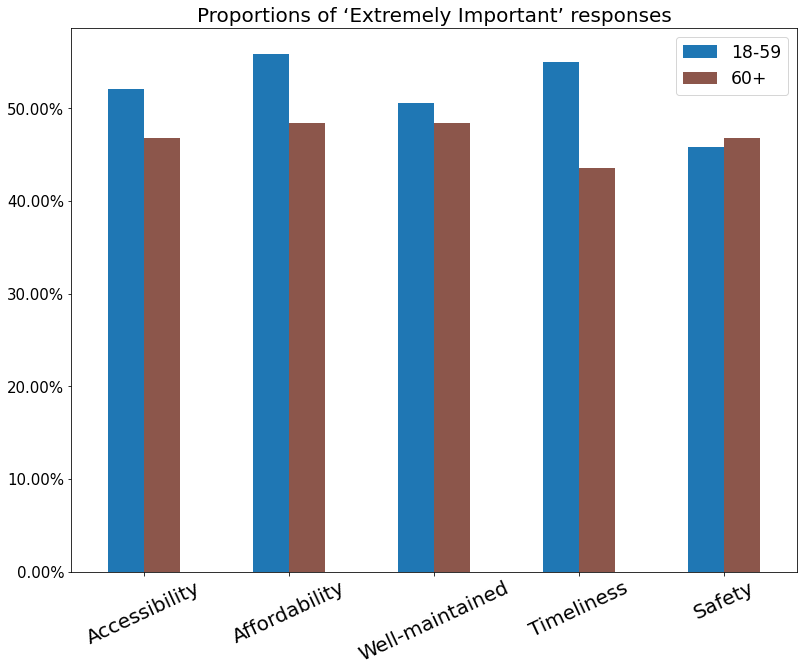

In [22]:
plt.figure(figsize=(20,100))
ax = factor_importance.transpose().plot.bar(figsize=(13,10),rot=0,color=['tab:blue','tab:brown'])

plt.title('Proportions of ‘Extremely Important’ responses', fontsize=20)
plt.ylabel('',fontsize=10)
ax.tick_params(axis='y',labelsize=15)
#ax.set_yticklabels( ('Close to Home','Affordable','Well-Maintained','Timely','Safe','Special Services') )
ax.tick_params(axis='x', labelsize=20,rotation=25)
ax.set_yticklabels(['{:,.2%}'.format(x) for x in ax.get_yticks()])
plt.legend(fontsize='xx-large')

In [23]:
#Accessibility
under_60_pub = df_2018[(df_2018['AGE4']!='60+') & (df_2018['Q24G'] == 'Yes')]['Q24G'].value_counts() / df_2018[df_2018['AGE4']!='60+']['Q24G'].value_counts().sum()
sixty_plus_pub = df_2018[(df_2018['AGE4']=='60+') & (df_2018['Q24G'] == 'Yes')]['Q24G'].value_counts() / df_2018[df_2018['AGE4']=='60+']['Q24G'].value_counts().sum()

#Affordability
under_60_walk =df_2018[(df_2018['AGE4']!='60+') & (df_2018['Q24A'] == 'Yes')]['Q24A'].value_counts() / df_2018[df_2018['AGE4']!='60+']['Q24A'].value_counts().sum()
sixty_plus_walk = df_2018[(df_2018['AGE4']=='60+') & (df_2018['Q24A'] == 'Yes')]['Q24A'].value_counts() / df_2018[df_2018['AGE4']=='60+']['Q24A'].value_counts().sum()

#Well-maintained
under_60_drive = df_2018[(df_2018['AGE4']!='60+') & (df_2018['Q24B'] == 'Yes')]['Q24B'].value_counts() / df_2018[df_2018['AGE4']!='60+']['Q24B'].value_counts().sum()
sixty_plus_drive = df_2018[(df_2018['AGE4']=='60+') & (df_2018['Q24B'] == 'Yes')]['Q24B'].value_counts() / df_2018[df_2018['AGE4']=='60+']['Q24B'].value_counts().sum()

#Timeliness
under_60_taxi = df_2018[(df_2018['AGE4']!='60+') & (df_2018['Q24C'] == 'Yes')]['Q24C'].value_counts() / df_2018[df_2018['AGE4']!='60+']['Q24C'].value_counts().sum()
sixty_plus_taxi = df_2018[(df_2018['AGE4']=='60+') & (df_2018['Q24C'] == 'Yes')]['Q24C'].value_counts() / df_2018[df_2018['AGE4']=='60+']['Q24C'].value_counts().sum()

#Safety
under_60_uber =df_2018[(df_2018['AGE4']!='60+') & (df_2018['Q24D'] == 'Yes')]['Q24D'].value_counts() / df_2018[df_2018['AGE4']!='60+']['Q24D'].value_counts().sum()
sixty_plus_uber = df_2018[(df_2018['AGE4']=='60+') & (df_2018['Q24D'] == 'Yes')]['Q24D'].value_counts() / df_2018[df_2018['AGE4']=='60+']['Q24D'].value_counts().sum()

#special trans
under_60_special =df_2018[(df_2018['AGE4']!='60+') & (df_2018['Q24F'] == 'Yes')]['Q24F'].value_counts() / df_2018[df_2018['AGE4']!='60+']['Q24F'].value_counts().sum()
sixty_plus_special = df_2018[(df_2018['AGE4']=='60+') & (df_2018['Q24F'] == 'Yes')]['Q24F'].value_counts() / df_2018[df_2018['AGE4']=='60+']['Q24F'].value_counts().sum()

#no leave
under_60_no =df_2018[(df_2018['AGE4']!='60+') & (df_2018['Q24J'] == 'Yes')]['Q24J'].value_counts() / df_2018[df_2018['AGE4']!='60+']['Q24J'].value_counts().sum()
sixty_plus_no = df_2018[(df_2018['AGE4']=='60+') & (df_2018['Q24J'] == 'Yes')]['Q24J'].value_counts() / df_2018[df_2018['AGE4']=='60+']['Q24J'].value_counts().sum()

In [24]:
pub_trans = under_60_pub.append(sixty_plus_pub)
walk = under_60_walk.append(sixty_plus_walk)
drive = under_60_drive.append(sixty_plus_drive)
taxi = under_60_taxi.append(sixty_plus_taxi)
uber = under_60_uber.append(sixty_plus_uber)
special = under_60_special.append(sixty_plus_special)
noleave = under_60_no.append(sixty_plus_no)
walk

Yes    0.463514
Yes    0.370450
Name: Q24A, dtype: float64

In [25]:
uber

Yes    0.074324
Yes    0.059957
Name: Q24D, dtype: float64

In [26]:
#Make a new dataframe with all the factor
mode_frame = pd.DataFrame({'Public Transit': pub_trans,
                   'Walk': walk, 'Drive': drive, 'Taxi': taxi, 'Uber': uber, 'Special Services': special, 'Dont Leave': noleave
                          })

#Rename the rows to the respective age groups
mode_frame = mode_frame.set_axis(['18-59','60+'],axis=0)
mode_frame

,Public Transit,Walk,Drive,Taxi,Uber,Special Services,Dont Leave
18-59,0.229730,0.463514,0.783784,0.347973,0.074324,0.036486,0.027027
60+,0.132762,0.370450,0.837259,0.310493,0.059957,0.072805,0.004283


C:\Users\Tonyj\AppData\Local\Temp/ipykernel_984/2101731877.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.1%}'.format(x) for x in ax.get_yticks()])


<Figure size 1440x7200 with 0 Axes>

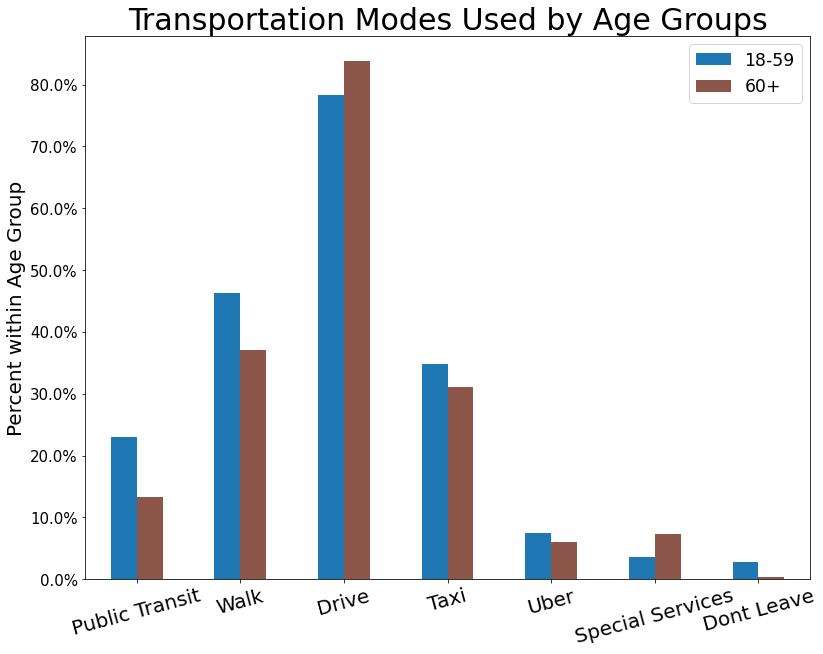

In [27]:
plt.figure(figsize=(20,100))
ax = mode_frame.transpose().plot.bar(figsize=(13,10),rot=0,color=['tab:blue','tab:brown'])

plt.title('Transportation Modes Used by Age Groups', fontsize=30)
plt.ylabel('Percent within Age Group',fontsize=20)
ax.tick_params(axis='y',labelsize=15)
#ax.set_yticklabels( ('Close to Home','Affordable','Well-Maintained','Timely','Safe','Special Services') )
ax.tick_params(axis='x', labelsize=20,rotation=15)
ax.set_yticklabels(['{:,.1%}'.format(x) for x in ax.get_yticks()])
plt.legend(fontsize='xx-large')

## overall breakdowns

In [28]:
df_2018['Q28_3A'].value_counts(normalize=True)

Extremely important     0.276836
Very important          0.264510
Somewhat important      0.231638
Not very important      0.138161
Not at all important    0.083719
SKIPPED ON WEB          0.005136
Name: Q28_3A, dtype: float64

In [29]:
df_2018['Q28_3B'].value_counts(normalize=True)

Extremely important     0.319979
Very important          0.297894
Somewhat important      0.212121
Not very important      0.094504
Not at all important    0.068824
SKIPPED ON WEB          0.006677
Name: Q28_3B, dtype: float64

In [30]:
df_2018['Q28_3C'].value_counts(normalize=True)

Very important          0.323061
Extremely important     0.310221
Somewhat important      0.204417
Not very important      0.091936
Not at all important    0.064715
SKIPPED ON WEB          0.005650
Name: Q28_3C, dtype: float64

In [31]:
df_2018['Q28_3D'].value_counts(normalize=True)

Extremely important     0.323575
Very important          0.317411
Somewhat important      0.196713
Not very important      0.087314
Not at all important    0.070365
SKIPPED ON WEB          0.004622
Name: Q28_3D, dtype: float64

In [32]:
df_2018['Q28_3E'].value_counts(normalize=True)

Extremely important     0.324088
Very important          0.319979
Somewhat important      0.210580
Not very important      0.070365
Not at all important    0.068824
SKIPPED ON WEB          0.006163
Name: Q28_3E, dtype: float64

In [33]:
df_2018['D26'].value_counts(normalize=True)

Suburban and mostly residential                         0.218285
Urban and mostly residential                            0.193118
Suburban with a mix of offices, apartments and shops    0.168464
Urban near mix of offices, apartments and shops         0.159733
Small town                                              0.133539
Rural area                                              0.119158
SKIPPED ON WEB                                          0.006163
DON’T KNOW                                              0.001541
Name: D26, dtype: float64

In [34]:
df_2018['AGE4'].value_counts(normalize=True)

30-44    0.279404
18-29    0.252183
60+      0.239856
45-59    0.228557
Name: AGE4, dtype: float64

In [35]:
df_2018['INCOME'].value_counts(normalize=True)

$40,000 to $49,999      0.088855
$50,000 to $59,999      0.088341
$85,000 to $99,999      0.087314
$60,000 to $74,999      0.084232
$100,000 to $124,999    0.073960
$20,000 to $24,999      0.069337
$25,000 to $29,999      0.063688
$10,000 to $14,999      0.058552
$30,000 to $34,999      0.057524
$125,000 to $149,999    0.047766
$15,000 to $19,999      0.047252
$35,000 to $39,999      0.044684
$75,000 to $84,999      0.043657
$5,000 to $9,999        0.040575
Less than $5,000        0.036466
$200,000 or more        0.031330
$150,000 to $174,999    0.027735
$175,000 to $199,999    0.008731
Name: INCOME, dtype: float64

In [36]:
df_2018['Q24G'].value_counts(normalize=True)

No                0.702106
Yes               0.206471
SKIPPED ON WEB    0.090909
DON’T KNOW        0.000514
Name: Q24G, dtype: float64

## EDA for D9 (Lonely and Isolated)

C:\Users\Tonyj\AppData\Local\Temp/ipykernel_984/3699756667.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.1%}'.format(x) for x in ax.get_yticks()])


<Figure size 1440x7200 with 0 Axes>

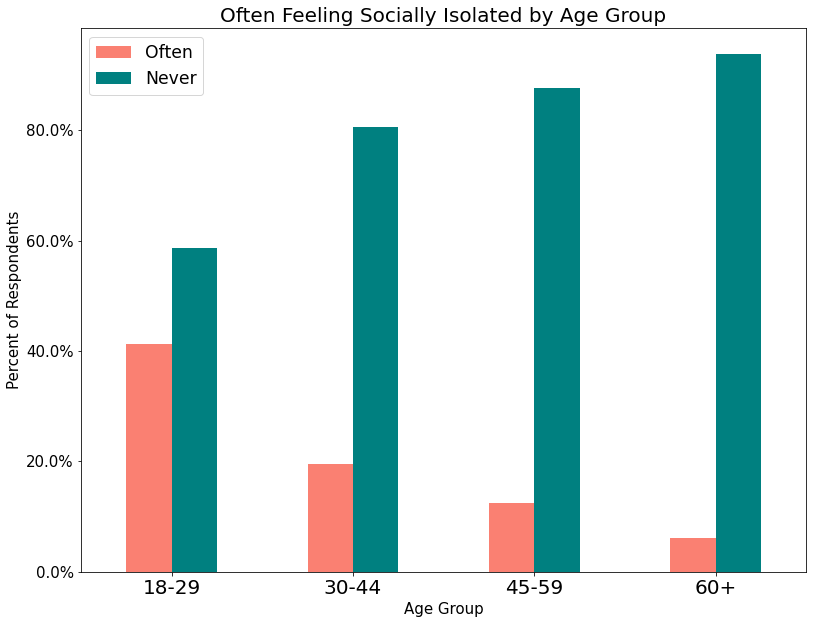

In [37]:
#Subset two only two answers
df_si= df_2018[(df_2018['D9C']=='Often') | (df_2018['D9C']=='Never')]

plt.figure(figsize=(20,100))
ax = pd.crosstab(df_si['AGE4'],df_si['D9C'],normalize='index')[['Often','Never']].plot.bar(figsize=(13,10),rot=0,color=['salmon','teal'])

plt.title('Often Feeling Socially Isolated by Age Group', fontsize=20)
plt.ylabel('Percent of Respondents',fontsize=15)
plt.xlabel('Age Group',fontsize=15)
ax.tick_params(axis='y',labelsize=15)
ax.tick_params(axis='x', labelsize=20,rotation=0)
ax.set_yticklabels(['{:,.1%}'.format(x) for x in ax.get_yticks()])
plt.legend(fontsize='xx-large')

## Creating bins for being socially isolated or not

In [38]:
df_2018['D9C'].unique()

array(['Never', 'Rarely', 'Sometimes', 'Often', 'SKIPPED ON WEB'],
      dtype=object)

In [39]:
def label_si (row):
    if row['D9C'] in ['Sometimes','Often']:
        return 1
    if row['D9C'] in ['Never','Rarely','SKIPPED ON WEB']:
        return 0

df_2018['is_si'] = df_2018.apply(lambda row: label_si(row), axis=1)

In [40]:
df_2018['is_si'].describe()

count    1947.000000
mean        0.319466
std         0.466389
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: is_si, dtype: float64

C:\Users\Tonyj\AppData\Local\Temp/ipykernel_984/1857899530.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.1%}'.format(x) for x in ax.get_yticks()])


Text(0.07, -0.01, '**Data: AARP 2018 Home and Community Preferences Survey')

<Figure size 1440x7200 with 0 Axes>

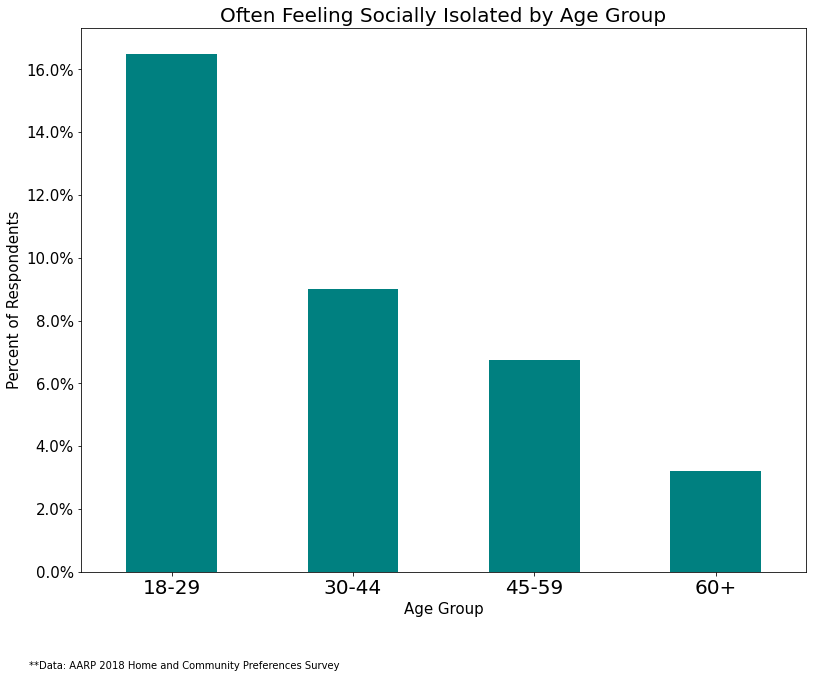

In [41]:
#Subset two only two answers
df_si= df_2018[(df_2018['D9C']=='Often') | (df_2018['D9C']=='Never')]

plt.figure(figsize=(20,100))
ax = pd.crosstab(df_2018['AGE4'],df_2018['D9C'],normalize='index')[['Often']].plot.bar(figsize=(13,10),rot=0,color=['teal'],legend=None)

plt.title('Often Feeling Socially Isolated by Age Group', fontsize=20)
plt.ylabel('Percent of Respondents',fontsize=15)
plt.xlabel('Age Group',fontsize=15)
ax.tick_params(axis='y',labelsize=15)
ax.tick_params(axis='x', labelsize=20,rotation=0)
ax.set_yticklabels(['{:,.1%}'.format(x) for x in ax.get_yticks()])
plt.figtext(0.07, -0.01,'**Data: AARP 2018 Home and Community Preferences Survey',fontsize=10)

In [42]:
df_2018.groupby('AGE4')['is_si'].describe()['mean']

AGE4
18-29    0.480652
30-44    0.330882
45-59    0.267416
60+      0.186296
Name: mean, dtype: float64

In [43]:
pd.crosstab(df_2018['AGE4'],df_2018['is_si'],normalize='index')

is_si,0,1
AGE4,,
18-29,0.519348,0.480652
30-44,0.669118,0.330882
45-59,0.732584,0.267416
60+,0.813704,0.186296


C:\Users\Tonyj\AppData\Local\Temp/ipykernel_984/2291463672.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.1%}'.format(x) for x in ax.get_yticks()])


Text(0.07, -0.01, '**Data: AARP 2018 Home and Community Preferences Survey')

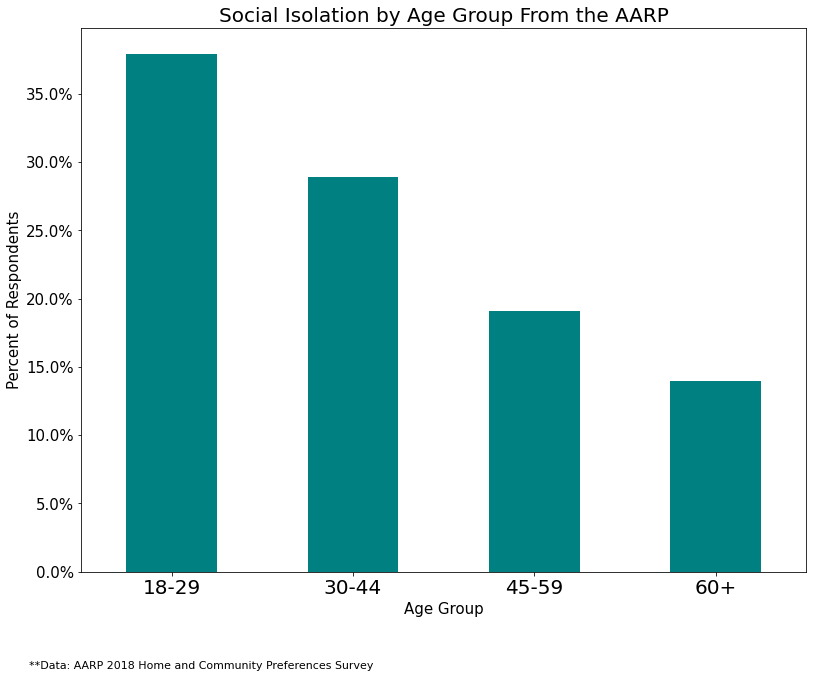

In [44]:
plt.figure(figsize=(20,100))
ax = df_2018[df_2018['is_si']==1]['AGE4'].value_counts(normalize=True).plot.bar(figsize=(13,10),rot=0,color=['teal'])

plt.title('Social Isolation by Age Group From the AARP', fontsize=20)
plt.ylabel('Percent of Respondents',fontsize=15)
plt.xlabel('Age Group',fontsize=15)
ax.tick_params(axis='y',labelsize=15)
ax.tick_params(axis='x', labelsize=20,rotation=0)
ax.set_yticklabels(['{:,.1%}'.format(x) for x in ax.get_yticks()])
plt.figtext(0.07, -0.01,'**Data: AARP 2018 Home and Community Preferences Survey',fontsize=11)

C:\Users\Tonyj\AppData\Local\Temp/ipykernel_984/1154871977.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.1%}'.format(x) for x in ax.get_yticks()])


Text(0.07, -0.01, '**Data: AARP 2018 Home and Community Preferences Survey')

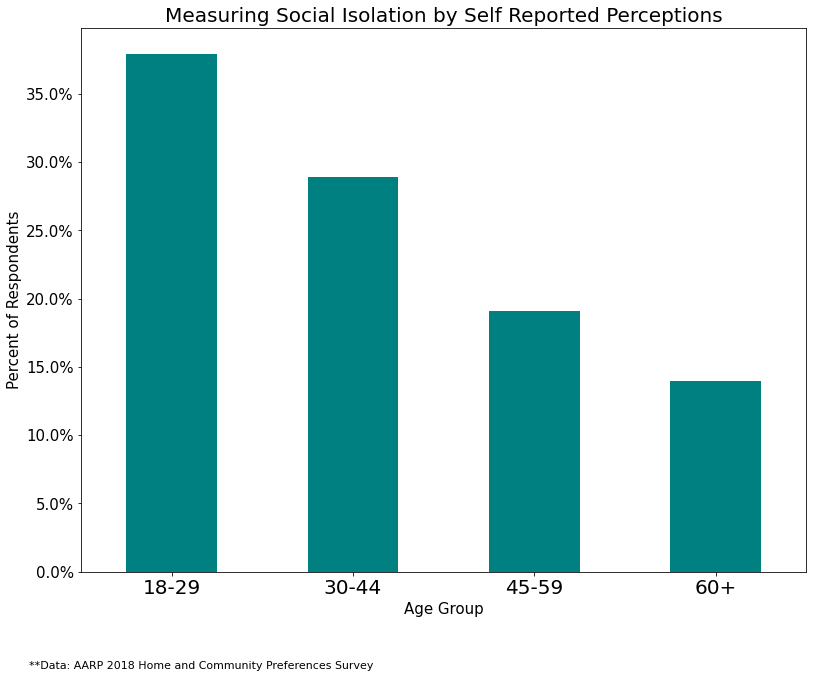

In [45]:
plt.figure(figsize=(20,100))
ax = df_2018[df_2018['is_si']==1]['AGE4'].value_counts(normalize=True).plot.bar(figsize=(13,10),rot=0,color=['teal'])

plt.title('Measuring Social Isolation by Self Reported Perceptions', fontsize=20)
plt.ylabel('Percent of Respondents',fontsize=15)
plt.xlabel('Age Group',fontsize=15)
ax.tick_params(axis='y',labelsize=15)
ax.tick_params(axis='x', labelsize=20,rotation=0)
ax.set_yticklabels(['{:,.1%}'.format(x) for x in ax.get_yticks()])
plt.figtext(0.07, -0.01,'**Data: AARP 2018 Home and Community Preferences Survey',fontsize=11)

In [46]:
df_si['D9C']

0       Never
3       Never
4       Never
5       Often
6       Never
        ...  
1938    Never
1940    Never
1942    Never
1943    Never
1945    Never
Name: D9C, Length: 932, dtype: object

C:\Users\Tonyj\AppData\Local\Temp/ipykernel_984/1710804471.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2%}'.format(x) for x in ax.get_yticks()])


<Figure size 1440x7200 with 0 Axes>

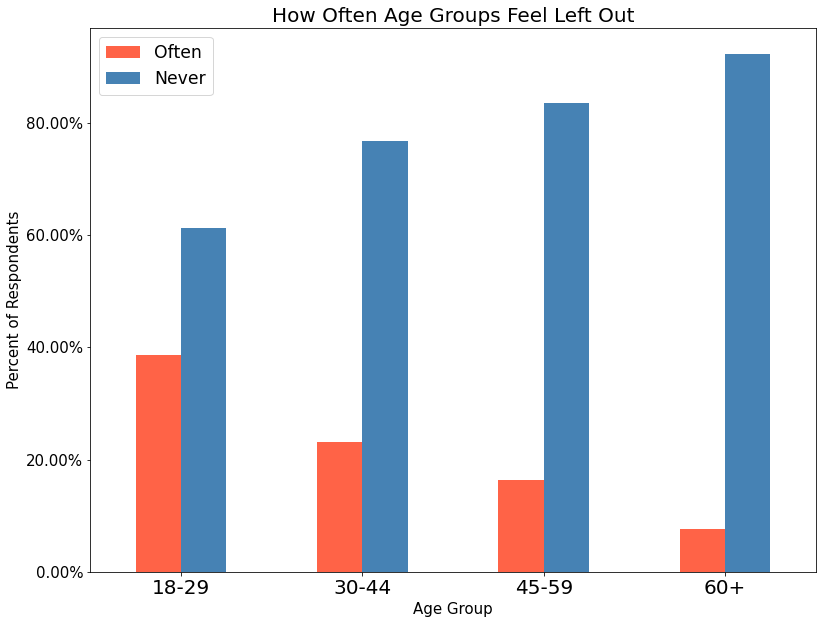

In [47]:
df_lo= df_2018[(df_2018['D9B']=='Often') | (df_2018['D9B']=='Never')]

plt.figure(figsize=(20,100))
ax = pd.crosstab(df_lo['AGE4'],df_lo['D9B'],normalize='index')[['Often','Never']].plot.bar(figsize=(13,10),rot=0,color=['tomato','steelblue'])

plt.title('How Often Age Groups Feel Left Out', fontsize=20)
plt.ylabel('Percent of Respondents',fontsize=15)
plt.xlabel('Age Group',fontsize=15)
ax.tick_params(axis='y',labelsize=15)
ax.tick_params(axis='x', labelsize=20,rotation=0)
ax.set_yticklabels(['{:,.2%}'.format(x) for x in ax.get_yticks()])
plt.legend(fontsize='xx-large')

C:\Users\Tonyj\AppData\Local\Temp/ipykernel_984/1884885208.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2%}'.format(x) for x in ax.get_yticks()])


<Figure size 1440x7200 with 0 Axes>

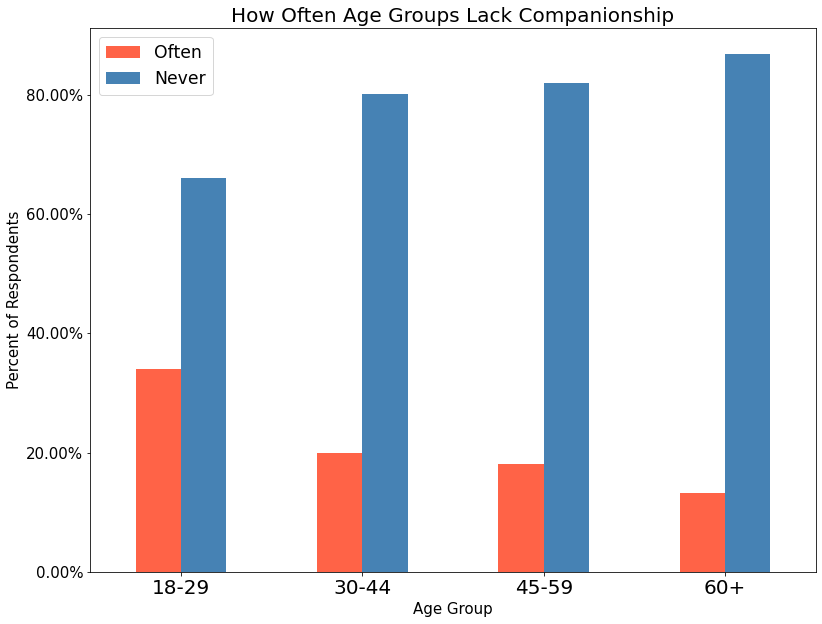

In [48]:
df_comp= df_2018[(df_2018['D9A']=='Often') | (df_2018['D9A']=='Never')]

plt.figure(figsize=(20,100))
ax = pd.crosstab(df_comp['AGE4'],df_comp['D9A'],normalize='index')[['Often','Never']].plot.bar(figsize=(13,10),rot=0,color=['tomato','steelblue'])

plt.title('How Often Age Groups Lack Companionship', fontsize=20)
plt.ylabel('Percent of Respondents',fontsize=15)
plt.xlabel('Age Group',fontsize=15)
ax.tick_params(axis='y',labelsize=15)
ax.tick_params(axis='x', labelsize=20,rotation=0)
ax.set_yticklabels(['{:,.2%}'.format(x) for x in ax.get_yticks()])
plt.legend(fontsize='xx-large')

C:\Users\Tonyj\AppData\Local\Temp/ipykernel_984/2452026115.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2%}'.format(x) for x in ax.get_yticks()])


<Figure size 1440x7200 with 0 Axes>

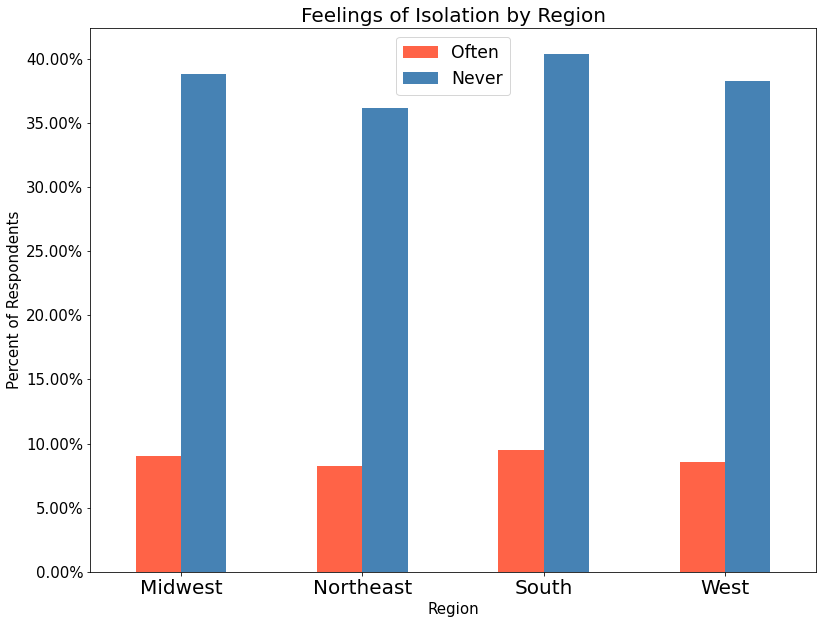

In [49]:
plt.figure(figsize=(20,100))
ax = pd.crosstab(df_2018['REGION4'],df_2018['D9C'],normalize='index')[['Often','Never']].plot.bar(figsize=(13,10),rot=0,color=['tomato','steelblue'])

plt.title('Feelings of Isolation by Region', fontsize=20)
plt.ylabel('Percent of Respondents',fontsize=15)
plt.xlabel('Region',fontsize=15)
ax.tick_params(axis='y',labelsize=15)
ax.tick_params(axis='x', labelsize=20,rotation=0)
ax.set_yticklabels(['{:,.2%}'.format(x) for x in ax.get_yticks()])
plt.legend(fontsize='xx-large')

Text(0.07, -0.15, '**Data: AARP 2018 Home and Community Preferences Survey')

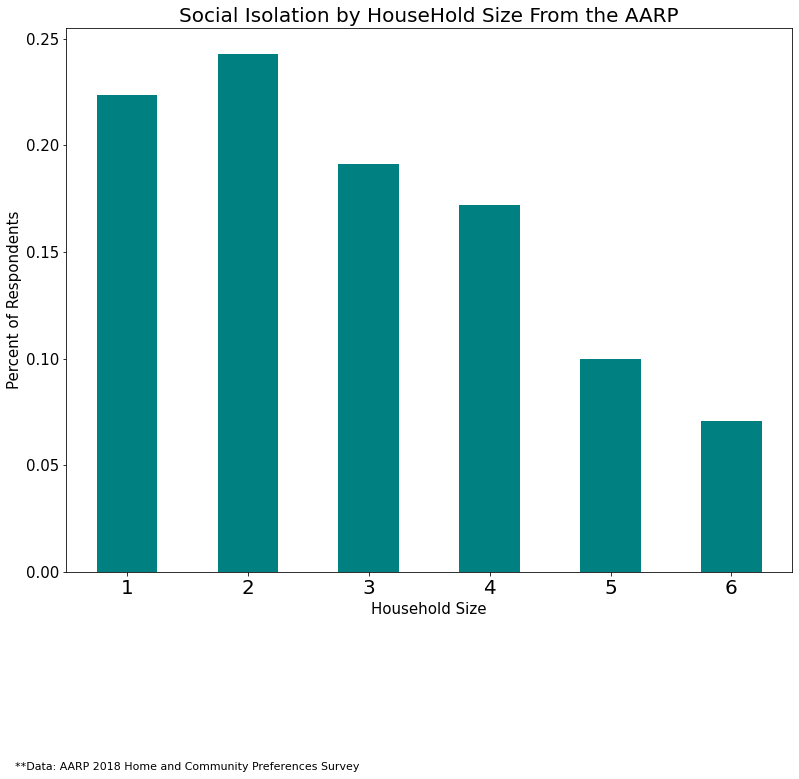

In [50]:
plt.figure(figsize=(20,100))
ax = df_2018[df_2018['is_si']==1]['HHSIZE'].value_counts(normalize=True)[[1,2,3,4,5,6]].plot.bar(figsize=(13,10),rot=0,color=['teal'])

plt.title('Social Isolation by HouseHold Size From the AARP', fontsize=20)
plt.ylabel('Percent of Respondents',fontsize=15)
plt.xlabel('Household Size',fontsize=15)
ax.tick_params(axis='y',labelsize=15)
ax.tick_params(axis='x', labelsize=20,rotation=0)
#ax.set_yticklabels(['{:,.1%}'.format(x) for x in ax.get_yticks()])
plt.figtext(0.07, -0.15,'**Data: AARP 2018 Home and Community Preferences Survey',fontsize=11)
#plt.setp(ax.xaxis.get_majorticklabels(), ha="right" )

Text(0.07, -0.02, '**Data: AARP 2018 Home and Community Preferences Survey')

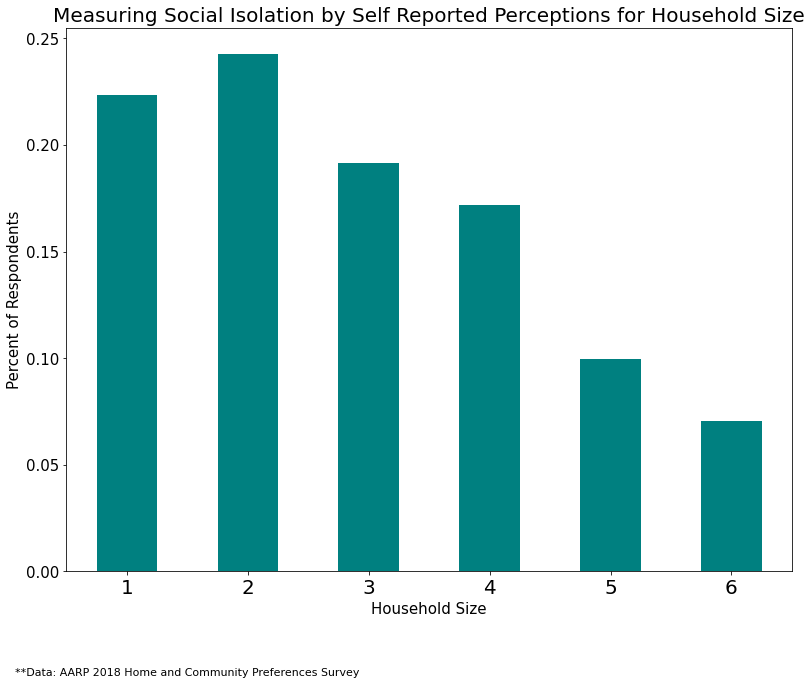

In [51]:
plt.figure(figsize=(20,100))
ax = df_2018[df_2018['is_si']==1]['HHSIZE'].value_counts(normalize=True)[[1,2,3,4,5,6]].plot.bar(figsize=(13,10),rot=0,color=['teal'])

plt.title('Measuring Social Isolation by Self Reported Perceptions for Household Size', fontsize=20)
plt.ylabel('Percent of Respondents',fontsize=15)
plt.xlabel('Household Size',fontsize=15)
ax.tick_params(axis='y',labelsize=15)
ax.tick_params(axis='x', labelsize=20,rotation=0)
#ax.set_yticklabels(['{:,.1%}'.format(x) for x in ax.get_yticks()])
plt.figtext(0.07, -0.02,'**Data: AARP 2018 Home and Community Preferences Survey',fontsize=11)
#plt.setp(ax.xaxis.get_majorticklabels(), ha="right" )

C:\Users\Tonyj\AppData\Local\Temp/ipykernel_984/197935274.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.1%}'.format(x) for x in ax.get_yticks()])


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

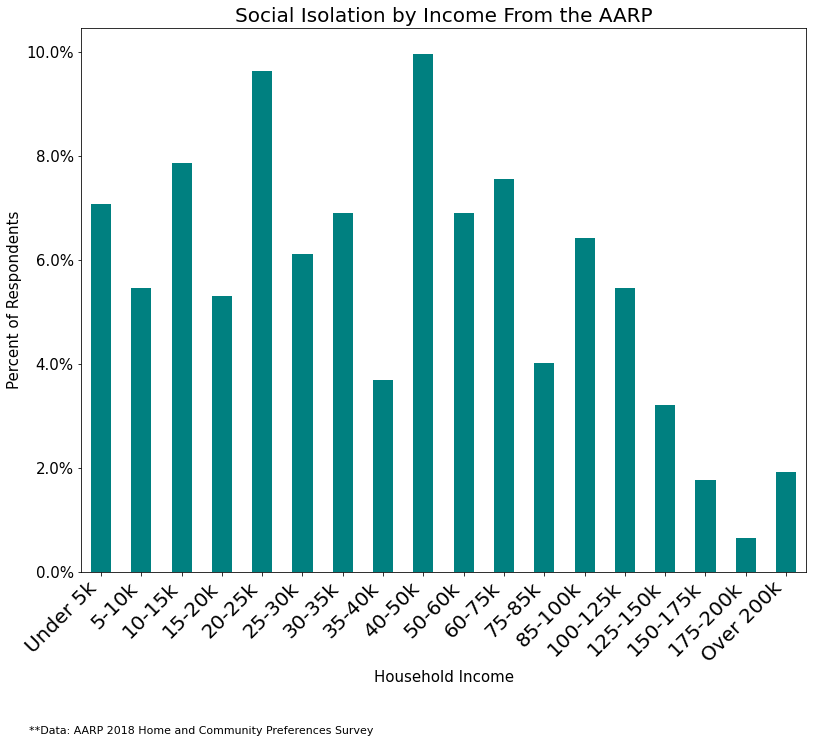

In [52]:
plt.figure(figsize=(20,100))
ax = df_2018[df_2018['is_si']==1]['INCOME'].value_counts(normalize=True)[[4,10,2,11,1,8,6,13,0,5,3,12,7,9,14,16,17,15]].plot.bar(figsize=(13,10),rot=0,color=['teal'])

plt.title('Social Isolation by Income From the AARP', fontsize=20)
plt.ylabel('Percent of Respondents',fontsize=15)
plt.xlabel('Household Income',fontsize=15)
ax.tick_params(axis='y',labelsize=15)
ax.tick_params(axis='x', labelsize=20,rotation=45)
ax.set_yticklabels(['{:,.1%}'.format(x) for x in ax.get_yticks()])
ax.set_xticklabels(['Under 5k','5-10k','10-15k','15-20k','20-25k','25-30k','30-35k','35-40k','40-50k','50-60k','60-75k','75-85k','85-100k','100-125k','125-150k','150-175k','175-200k','Over 200k'])
plt.figtext(0.07, -0.1,'**Data: AARP 2018 Home and Community Preferences Survey',fontsize=11)
plt.setp(ax.xaxis.get_majorticklabels(), ha="right" )

**** Below is same as above but changing title

C:\Users\Tonyj\AppData\Local\Temp/ipykernel_984/2105570527.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.1%}'.format(x) for x in ax.get_yticks()])


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

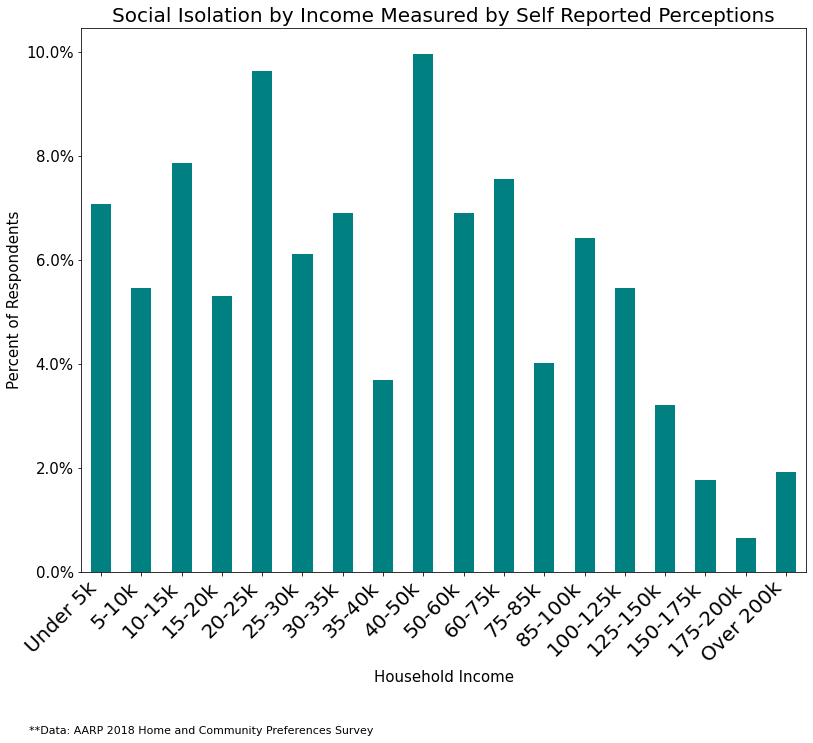

In [53]:
plt.figure(figsize=(20,100))
ax = df_2018[df_2018['is_si']==1]['INCOME'].value_counts(normalize=True)[[4,10,2,11,1,8,6,13,0,5,3,12,7,9,14,16,17,15]].plot.bar(figsize=(13,10),rot=0,color=['teal'])

plt.title('Social Isolation by Income Measured by Self Reported Perceptions', fontsize=20)
plt.ylabel('Percent of Respondents',fontsize=15)
plt.xlabel('Household Income',fontsize=15)
ax.tick_params(axis='y',labelsize=15)
ax.tick_params(axis='x', labelsize=20,rotation=45)
ax.set_yticklabels(['{:,.1%}'.format(x) for x in ax.get_yticks()])
ax.set_xticklabels(['Under 5k','5-10k','10-15k','15-20k','20-25k','25-30k','30-35k','35-40k','40-50k','50-60k','60-75k','75-85k','85-100k','100-125k','125-150k','150-175k','175-200k','Over 200k'])
plt.figtext(0.07, -0.1,'**Data: AARP 2018 Home and Community Preferences Survey',fontsize=11)
plt.setp(ax.xaxis.get_majorticklabels(), ha="right" )

C:\Users\Tonyj\AppData\Local\Temp/ipykernel_984/1119975509.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2%}'.format(x) for x in ax.get_yticks()])


<Figure size 1440x7200 with 0 Axes>

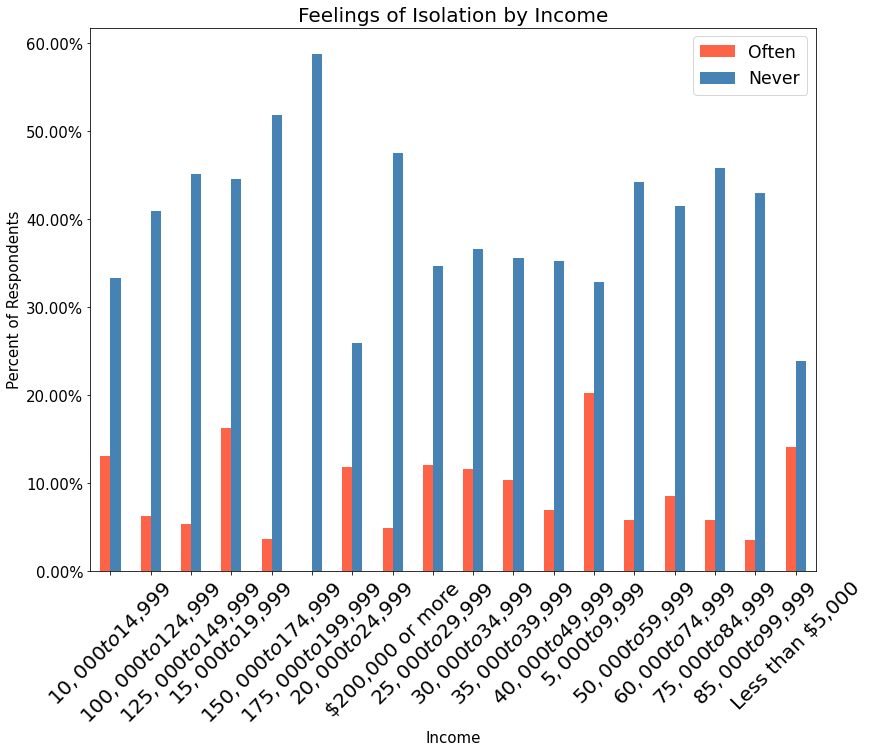

In [54]:
plt.figure(figsize=(20,100))
ax = pd.crosstab(df_2018['INCOME'],df_2018['D9C'],normalize='index')[['Often','Never']].plot.bar(figsize=(13,10),rot=0,color=['tomato','steelblue'])

plt.title('Feelings of Isolation by Income', fontsize=20)
plt.ylabel('Percent of Respondents',fontsize=15)
plt.xlabel('Income',fontsize=15)
ax.tick_params(axis='y',labelsize=15)
ax.tick_params(axis='x', labelsize=20,rotation=45)
ax.set_yticklabels(['{:,.2%}'.format(x) for x in ax.get_yticks()])
plt.legend(fontsize='xx-large')

C:\Users\Tonyj\AppData\Local\Temp/ipykernel_984/3747336081.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.1%}'.format(x) for x in ax.get_yticks()])


[None, None, None, None, None, None, None, None]

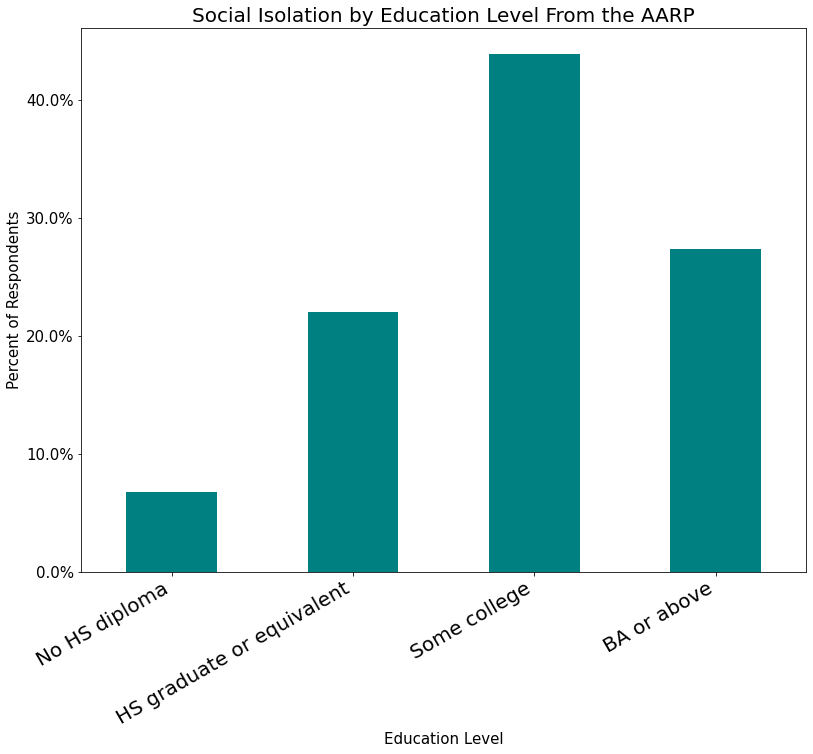

In [55]:
plt.figure(figsize=(20,100))
ax = df_2018[df_2018['is_si']==1]['EDUC4'].value_counts(normalize=True)[[3,2,0,1]].plot.bar(figsize=(13,10),rot=0,color=['teal'])

plt.title('Social Isolation by Education Level From the AARP', fontsize=20)
plt.ylabel('Percent of Respondents',fontsize=15)
plt.xlabel('Education Level',fontsize=15)
ax.tick_params(axis='y',labelsize=15)
ax.tick_params(axis='x', labelsize=20,rotation=30)
ax.set_yticklabels(['{:,.1%}'.format(x) for x in ax.get_yticks()])
#ax.set_xticklabels(['Under 5k','5-10k','10-15k','15-20k','20-25k','25-30k','30-35k','35-40k','40-50k','50-60k','60-75k','75-85k','85-100k','100-125k','125-150k','150-175k','175-200k','Over 200k'])
#plt.figtext(0.07, -0.1,'**Data: AARP 2018 Home and Community Preferences Survey',fontsize=11)
plt.setp(ax.xaxis.get_majorticklabels(), ha="right" )

C:\Users\Tonyj\AppData\Local\Temp/ipykernel_984/456455154.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.1%}'.format(x) for x in ax.get_yticks()])


[None, None, None, None, None, None, None, None]

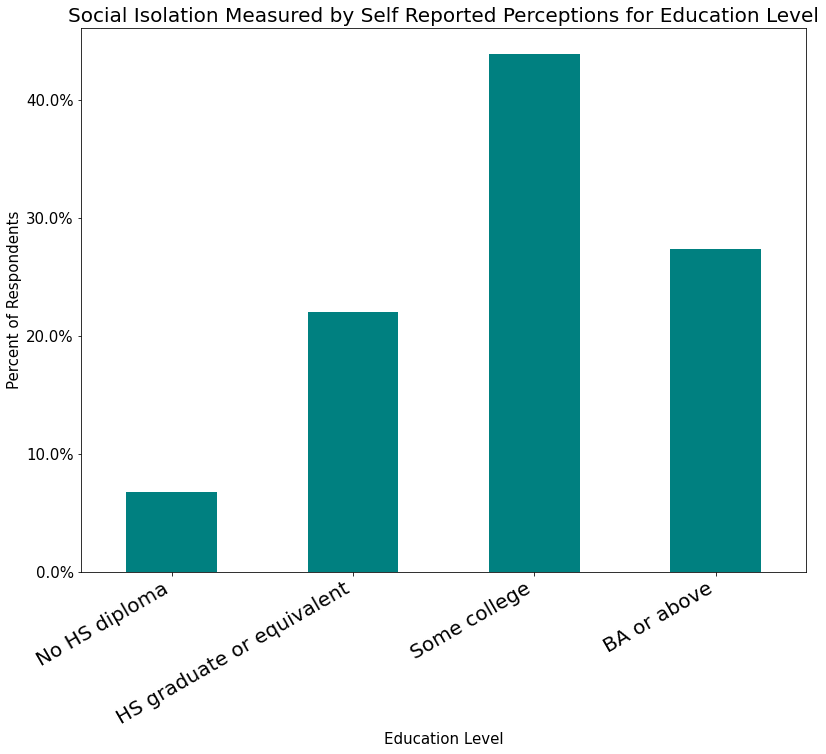

In [56]:
plt.figure(figsize=(20,100))
ax = df_2018[df_2018['is_si']==1]['EDUC4'].value_counts(normalize=True)[[3,2,0,1]].plot.bar(figsize=(13,10),rot=0,color=['teal'])

plt.title('Social Isolation Measured by Self Reported Perceptions for Education Level', fontsize=20)
plt.ylabel('Percent of Respondents',fontsize=15)
plt.xlabel('Education Level',fontsize=15)
ax.tick_params(axis='y',labelsize=15)
ax.tick_params(axis='x', labelsize=20,rotation=30)
ax.set_yticklabels(['{:,.1%}'.format(x) for x in ax.get_yticks()])
#ax.set_xticklabels(['Under 5k','5-10k','10-15k','15-20k','20-25k','25-30k','30-35k','35-40k','40-50k','50-60k','60-75k','75-85k','85-100k','100-125k','125-150k','150-175k','175-200k','Over 200k'])
#plt.figtext(0.07, -0.1,'**Data: AARP 2018 Home and Community Preferences Survey',fontsize=11)
plt.setp(ax.xaxis.get_majorticklabels(), ha="right" )

In [ ]:
df_2018['EDUC4']

C:\Users\Tonyj\AppData\Local\Temp/ipykernel_984/1504570600.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2%}'.format(x) for x in ax.get_yticks()])


<Figure size 1440x7200 with 0 Axes>

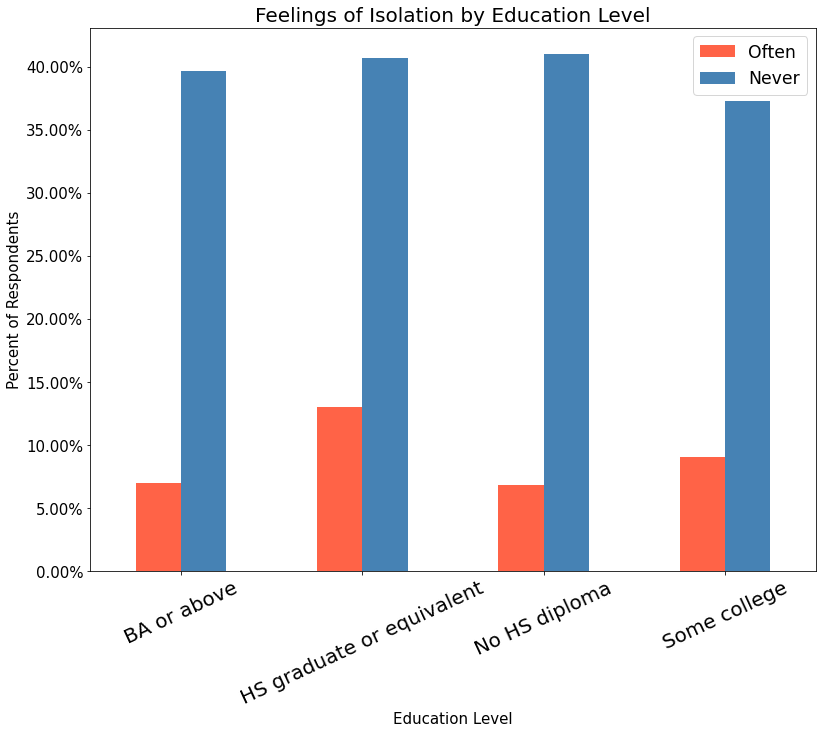

In [57]:
plt.figure(figsize=(20,100))
ax = pd.crosstab(df_2018['EDUC4'],df_2018['D9C'],normalize='index')[['Often','Never']].plot.bar(figsize=(13,10),rot=0,color=['tomato','steelblue'])

plt.title('Feelings of Isolation by Education Level', fontsize=20)
plt.ylabel('Percent of Respondents',fontsize=15)
plt.xlabel('Education Level',fontsize=15)
ax.tick_params(axis='y',labelsize=15)
ax.tick_params(axis='x', labelsize=20,rotation=25)
ax.set_yticklabels(['{:,.2%}'.format(x) for x in ax.get_yticks()])
plt.legend(fontsize='xx-large')

C:\Users\Tonyj\AppData\Local\Temp/ipykernel_984/2271313831.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.1%}'.format(x) for x in ax.get_yticks()])


Text(0.07, -0.01, '**Data: AARP 2018 Home and Community Preferences Survey')

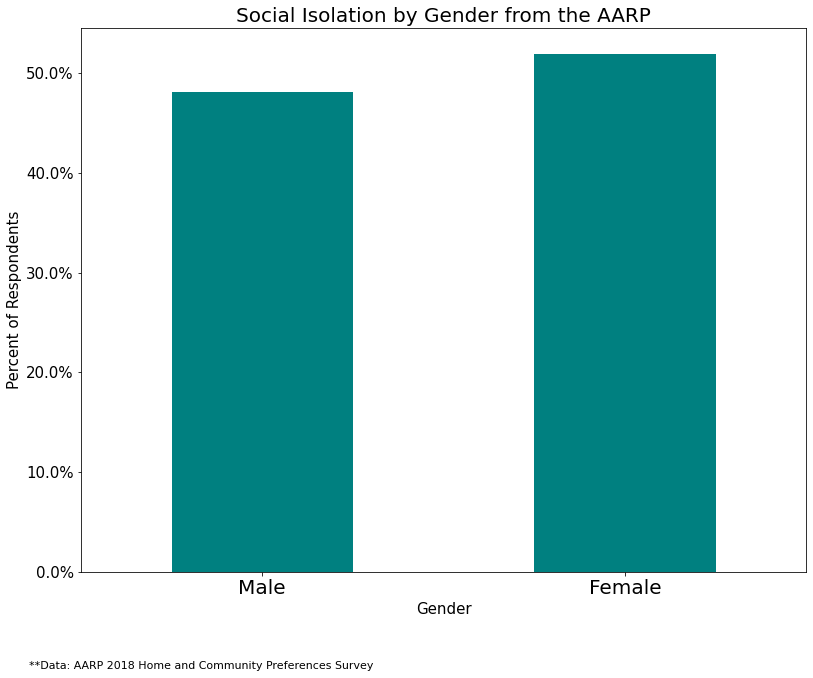

In [146]:
plt.figure(figsize=(20,100))
ax = df_2018[df_2018['is_si']==1]['GENDER'].value_counts(normalize=True)[[1,0]].plot.bar(figsize=(13,10),rot=0,color=['teal'])

plt.title('Social Isolation by Gender from the AARP', fontsize=20)
plt.ylabel('Percent of Respondents',fontsize=15)
plt.xlabel('Gender',fontsize=15)
ax.tick_params(axis='y',labelsize=15)
ax.tick_params(axis='x', labelsize=20,rotation=0)
ax.set_yticklabels(['{:,.1%}'.format(x) for x in ax.get_yticks()])
plt.figtext(0.07, -0.01,'**Data: AARP 2018 Home and Community Preferences Survey',fontsize=11)
#plt.setp(ax.xaxis.get_majorticklabels(), ha="right" )

C:\Users\Tonyj\AppData\Local\Temp/ipykernel_984/1897655821.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.1%}'.format(x) for x in ax.get_yticks()])


Text(0.07, -0.01, '**Data: AARP 2018 Home and Community Preferences Survey')

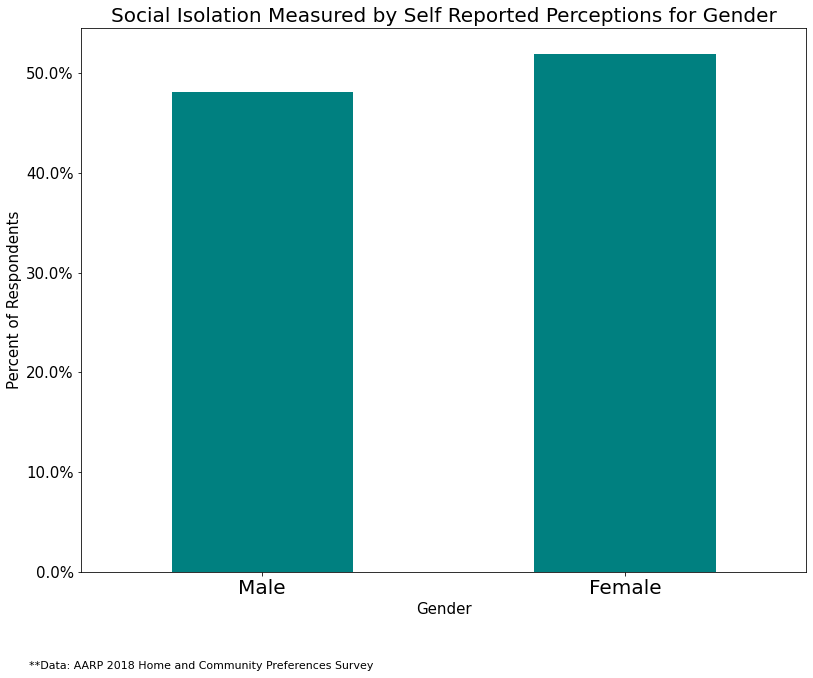

In [147]:
plt.figure(figsize=(20,100))
ax = df_2018[df_2018['is_si']==1]['GENDER'].value_counts(normalize=True)[[1,0]].plot.bar(figsize=(13,10),rot=0,color=['teal'])

plt.title('Social Isolation Measured by Self Reported Perceptions for Gender', fontsize=20)
plt.ylabel('Percent of Respondents',fontsize=15)
plt.xlabel('Gender',fontsize=15)
ax.tick_params(axis='y',labelsize=15)
ax.tick_params(axis='x', labelsize=20,rotation=0)
ax.set_yticklabels(['{:,.1%}'.format(x) for x in ax.get_yticks()])
plt.figtext(0.07, -0.01,'**Data: AARP 2018 Home and Community Preferences Survey',fontsize=11)
#plt.setp(ax.xaxis.get_majorticklabels(), ha="right" )

C:\Users\Tonyj\AppData\Local\Temp/ipykernel_984/2186624002.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2%}'.format(x) for x in ax.get_yticks()])


<Figure size 1440x7200 with 0 Axes>

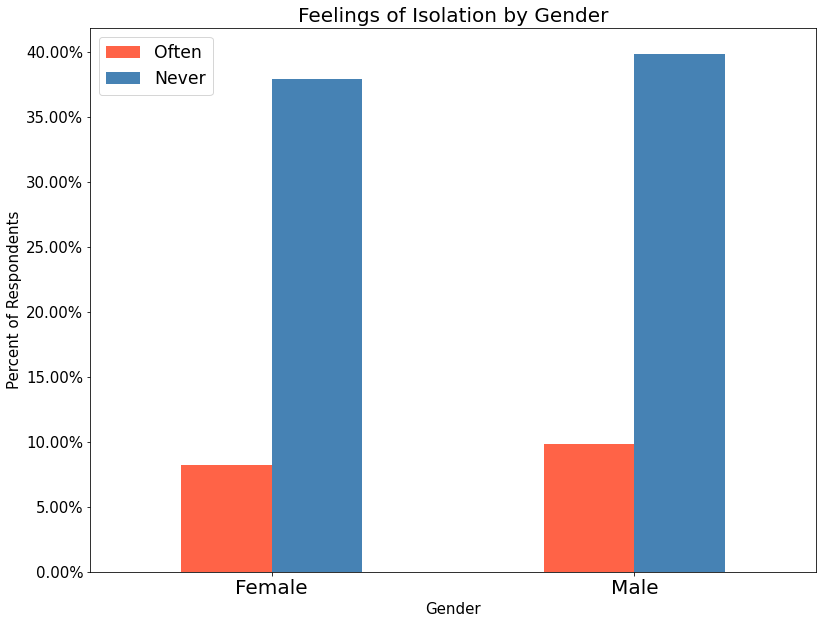

In [60]:
plt.figure(figsize=(20,100))
ax = pd.crosstab(df_2018['GENDER'],df_2018['D9C'],normalize='index')[['Often','Never']].plot.bar(figsize=(13,10),rot=0,color=['tomato','steelblue'])

plt.title('Feelings of Isolation by Gender', fontsize=20)
plt.ylabel('Percent of Respondents',fontsize=15)
plt.xlabel('Gender',fontsize=15)
ax.tick_params(axis='y',labelsize=15)
ax.tick_params(axis='x', labelsize=20,rotation=0)
ax.set_yticklabels(['{:,.2%}'.format(x) for x in ax.get_yticks()])
plt.legend(fontsize='xx-large')

C:\Users\Tonyj\AppData\Local\Temp/ipykernel_984/2287718608.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2%}'.format(x) for x in ax.get_yticks()])


<Figure size 1440x7200 with 0 Axes>

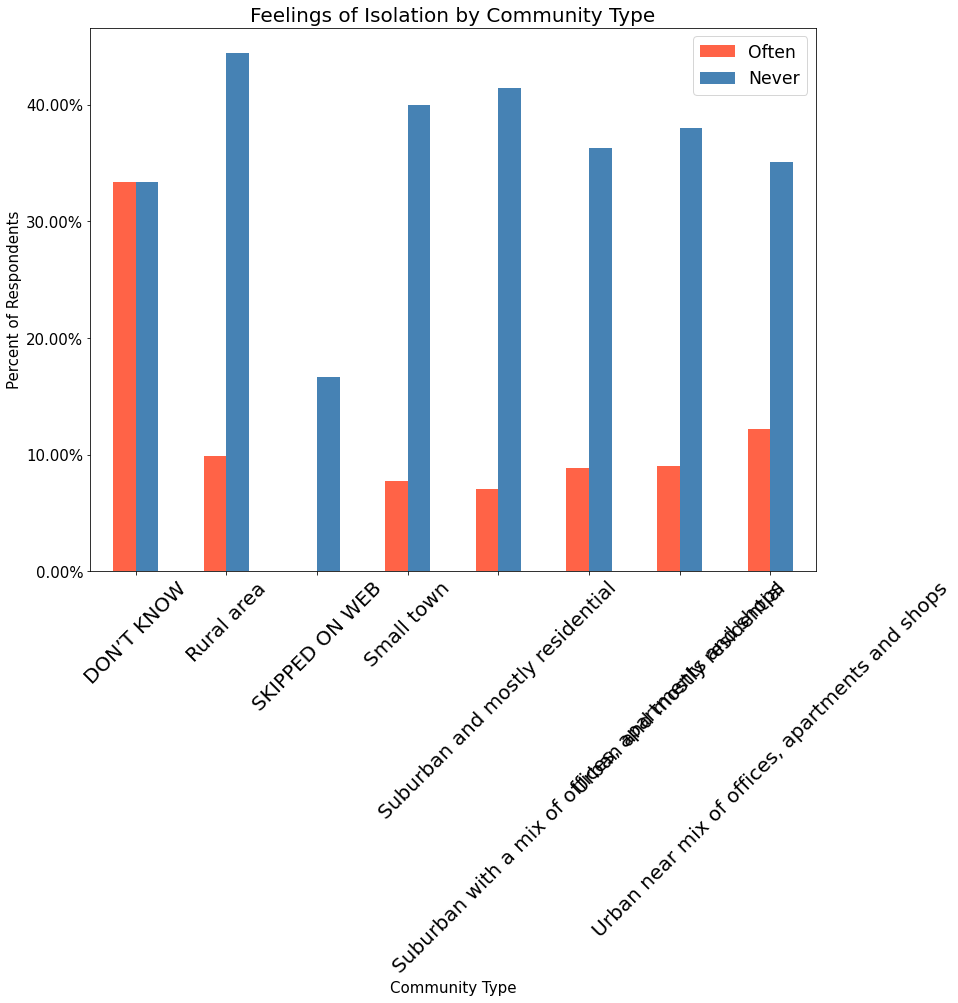

In [61]:
plt.figure(figsize=(20,100))
ax = pd.crosstab(df_2018['D26'],df_2018['D9C'],normalize='index')[['Often','Never']].plot.bar(figsize=(13,10),rot=0,color=['tomato','steelblue'])

plt.title('Feelings of Isolation by Community Type', fontsize=20)
plt.ylabel('Percent of Respondents',fontsize=15)
plt.xlabel('Community Type',fontsize=15)
ax.tick_params(axis='y',labelsize=15)
ax.tick_params(axis='x', labelsize=20,rotation=45)
ax.set_yticklabels(['{:,.2%}'.format(x) for x in ax.get_yticks()])
plt.legend(fontsize='xx-large')

C:\Users\Tonyj\AppData\Local\Temp/ipykernel_984/3804034494.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2%}'.format(x) for x in ax.get_yticks()])


<Figure size 1440x7200 with 0 Axes>

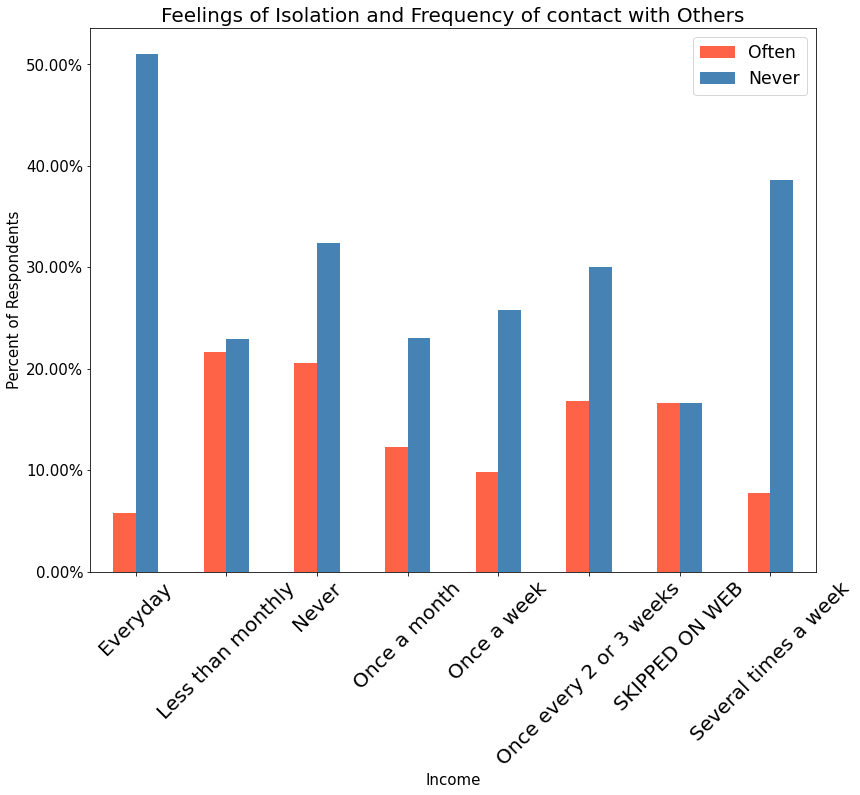

In [62]:
plt.figure(figsize=(20,100))
ax = pd.crosstab(df_2018['D8'],df_2018['D9C'],normalize='index')[['Often','Never']].plot.bar(figsize=(13,10),rot=0,color=['tomato','steelblue'])

plt.title('Feelings of Isolation and Frequency of contact with Others', fontsize=20)
plt.ylabel('Percent of Respondents',fontsize=15)
plt.xlabel('Income',fontsize=15)
ax.tick_params(axis='y',labelsize=15)
ax.tick_params(axis='x', labelsize=20,rotation=45)
ax.set_yticklabels(['{:,.2%}'.format(x) for x in ax.get_yticks()])
plt.legend(fontsize='xx-large')

C:\Users\Tonyj\AppData\Local\Temp/ipykernel_984/273605980.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2%}'.format(x) for x in ax.get_yticks()])


<Figure size 1440x7200 with 0 Axes>

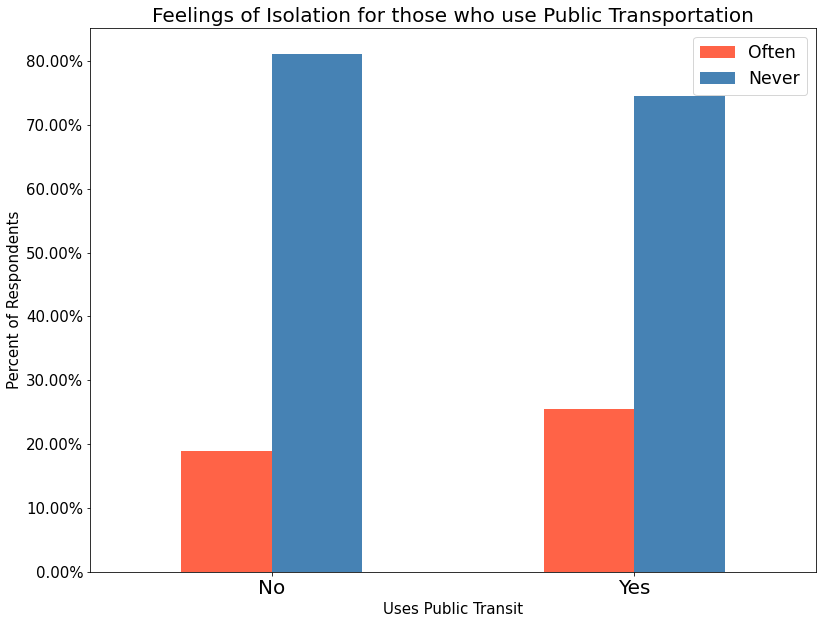

In [63]:
df_trans= df_2018[((df_2018['Q24F']=='Yes') | (df_2018['Q24F']=='No')) & ((df_2018['D9C']=='Often') | (df_2018['D9C']=='Never'))]
plt.figure(figsize=(20,100))
ax = pd.crosstab(df_trans['Q24F'],df_trans['D9C'],normalize='index')[['Often','Never']].plot.bar(figsize=(13,10),rot=0,color=['tomato','steelblue'])
plt.title('Feelings of Isolation for those who use Public Transportation', fontsize=20)
plt.ylabel('Percent of Respondents',fontsize=15)
plt.xlabel('Uses Public Transit',fontsize=15)
ax.tick_params(axis='y',labelsize=15)
ax.tick_params(axis='x', labelsize=20,rotation=0)
ax.set_yticklabels(['{:,.2%}'.format(x) for x in ax.get_yticks()])
plt.legend(fontsize='xx-large')

C:\Users\Tonyj\AppData\Local\Temp/ipykernel_984/3640353599.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2%}'.format(x) for x in ax.get_yticks()])


<Figure size 1440x7200 with 0 Axes>

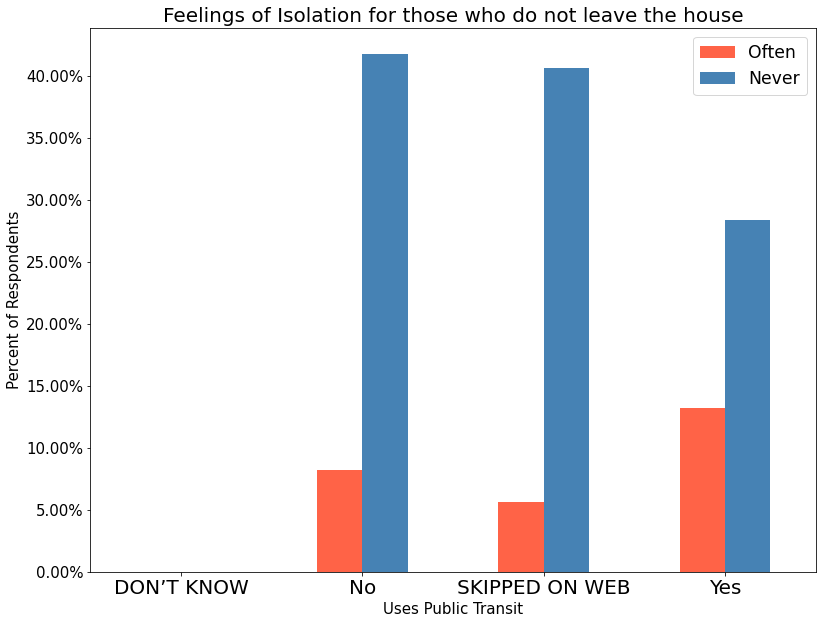

In [64]:
plt.figure(figsize=(20,100))
ax = pd.crosstab(df_2018['Q24G'],df_2018['D9C'],normalize='index')[['Often','Never']].plot.bar(figsize=(13,10),rot=0,color=['tomato','steelblue'])

plt.title('Feelings of Isolation for those who do not leave the house', fontsize=20)
plt.ylabel('Percent of Respondents',fontsize=15)
plt.xlabel('Uses Public Transit',fontsize=15)
ax.tick_params(axis='y',labelsize=15)
ax.tick_params(axis='x', labelsize=20,rotation=0)
ax.set_yticklabels(['{:,.2%}'.format(x) for x in ax.get_yticks()])
plt.legend(fontsize='xx-large')

## Graph for tSocially Isolated and Frequency of outside house interactions

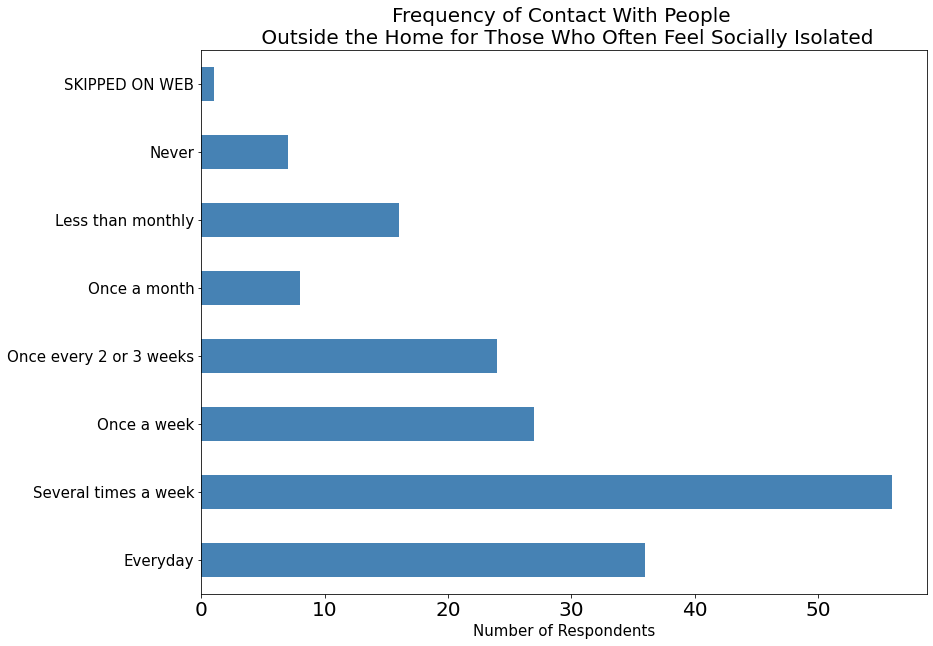

In [65]:
si_df = df_2018[df_2018['D9C']=='Often']

plt.figure(figsize=(20,100))
ax = si_df['D8'].value_counts()[[1,0,2,3,5,4,6,7]].plot.barh(figsize=(13,10),rot=0,color='steelblue')

plt.title('Frequency of Contact With People \n Outside the Home for Those Who Often Feel Socially Isolated', fontsize=20)
#plt.ylabel('Frequency',fontsize=15)
plt.xlabel('Number of Respondents',fontsize=15)
ax.tick_params(axis='y',labelsize=15)
ax.tick_params(axis='x', labelsize=20,rotation=0)
#ax.set_yticklabels(['{:,.2%}'.format(x) for x in ax.get_yticks()])
#plt.legend(fontsize='xx-large')

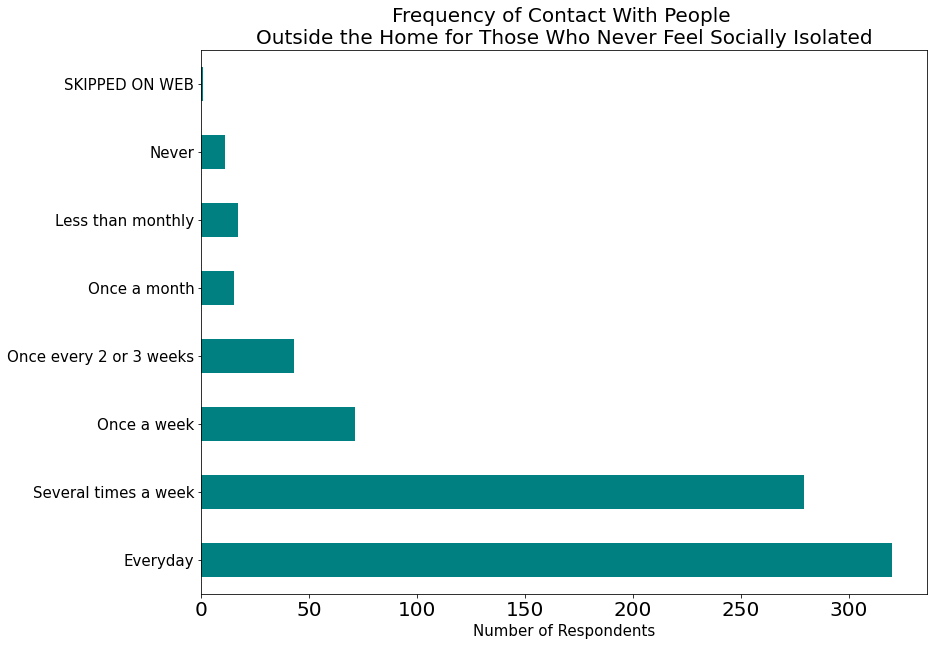

In [66]:
si_df = df_2018[df_2018['D9C']=='Never']

plt.figure(figsize=(20,100))
ax = si_df['D8'].value_counts()[[0,1,2,3,5,4,6,7]].plot.barh(figsize=(13,10),rot=0,color='teal')

plt.title('Frequency of Contact With People \nOutside the Home for Those Who Never Feel Socially Isolated', fontsize=20)
#plt.ylabel('Frequency',fontsize=15)
plt.xlabel('Number of Respondents',fontsize=15)
ax.tick_params(axis='y',labelsize=15)
ax.tick_params(axis='x', labelsize=20,rotation=0)
#ax.set_yticklabels(['{:,.2%}'.format(x) for x in ax.get_yticks()])
#plt.legend(fontsize='xx-large')

C:\Users\Tonyj\AppData\Local\Temp/ipykernel_984/3453478572.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.1%}'.format(x) for x in ax.get_yticks()])


Text(0.07, -0.02, '**Data: AARP 2018 Home and Community Preferences Survey')

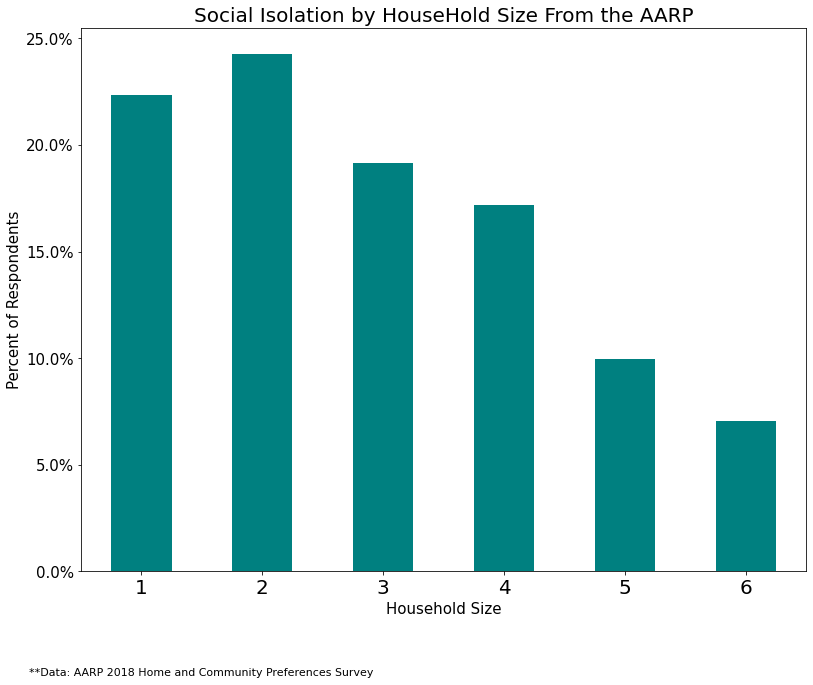

In [67]:
plt.figure(figsize=(20,100))
ax = df_2018[df_2018['is_si']==1]['HHSIZE'].value_counts(normalize=True)[[1,2,3,4,5,6]].plot.bar(figsize=(13,10),rot=0,color=['teal'])

plt.title('Social Isolation by HouseHold Size From the AARP', fontsize=20)
plt.ylabel('Percent of Respondents',fontsize=15)
plt.xlabel('Household Size',fontsize=15)
ax.tick_params(axis='y',labelsize=15)
ax.tick_params(axis='x', labelsize=20,rotation=0)
ax.set_yticklabels(['{:,.1%}'.format(x) for x in ax.get_yticks()])
plt.figtext(0.07, -0.02,'**Data: AARP 2018 Home and Community Preferences Survey',fontsize=11)
#plt.setp(ax.xaxis.get_majorticklabels(), ha="right" )

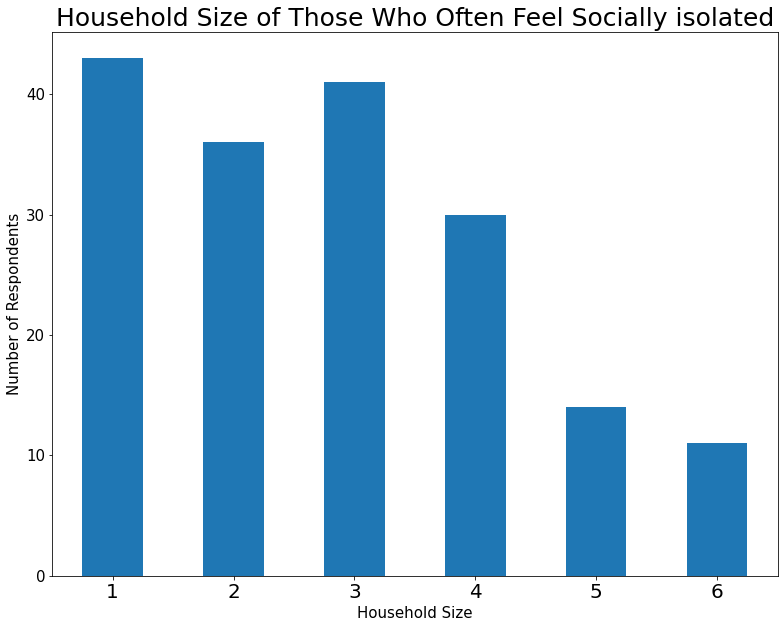

In [68]:
si_df = df_2018[df_2018['D9C']=='Often']

plt.figure(figsize=(20,100))
ax = si_df['HHSIZE'].value_counts()[[1,2,3,4,5,6]].plot.bar(figsize=(13,10),rot=0)

plt.title('Household Size of Those Who Often Feel Socially isolated', fontsize=25)
plt.ylabel('Number of Respondents',fontsize=15)
plt.xlabel('Household Size',fontsize=15)
ax.tick_params(axis='y',labelsize=15)
ax.tick_params(axis='x', labelsize=20,rotation=0)
#ax.set_yticklabels(['{:,.2%}'.format(x) for x in ax.get_yticks()])
#plt.legend(fontsize='xx-large')

In [69]:
si_df

,Unnamed: 0,CaseId,WEIGHT,LGBT,Q1,Q2,Q3,Q4A,Q4B,Q4C,...,filter_$,Ownership,housecomp,dumunder18,dumover18,dumcollege,dumparents,dumother,countInHouse,is_si
5,5,77.0,0.358276,Other,Somewhat agree,Somewhat disagree,Move to a different community,No,No,No,...,Selected,Rent,NaN,Other,Other,Other,Other,Yes,1.0,1
15,15,100.0,0.453580,Straight (that is not gay/lesbian),Strongly agree,Strongly disagree,Move into a different residence within your cu...,No,Yes,No,...,Selected,Other,NaN,Other,Yes,Yes,Yes,Other,3.0,1
17,17,107.0,6.004270,Straight (that is not gay/lesbian),Neither agree nor disagree,Somewhat disagree,Move into a different residence within your cu...,No,Yes,Yes,...,Selected,Rent,NaN,Yes,Other,Other,Yes,Yes,3.0,1
34,34,193.0,0.307273,Straight (that is not gay/lesbian),Strongly agree,Strongly agree,Move to a different community,No,Yes,No,...,Selected,Own,NaN,Other,Other,Other,Other,Yes,1.0,1
36,36,197.0,0.081751,Bisexual,Somewhat disagree,Neither agree nor disagree,Move to a different community,Yes,No,Yes,...,Selected,Other,NaN,Other,Other,Other,Yes,Other,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,1918,8092.0,0.203722,Bisexual,Somewhat disagree,Somewhat agree,Move to a different community,No,No,Yes,...,Selected,Rent,NaN,Other,Other,Other,Other,Other,0.0,1
1919,1919,8099.0,2.380161,Straight (that is not gay/lesbian),Strongly agree,Strongly agree,Stay in your current residence and never move,Yes,No,Yes,...,Selected,Rent,NaN,Other,Other,Other,Other,Other,0.0,1
1921,1921,8108.0,0.467560,Straight (that is not gay/lesbian),Somewhat agree,Somewhat agree,Not sure,Yes,No,Yes,...,Selected,Rent,NaN,Other,Other,Other,Other,Yes,1.0,1
1933,1933,8156.0,0.633565,Straight (that is not gay/lesbian),Strongly agree,Strongly agree,Stay in your current residence and never move,Yes,No,Yes,...,Selected,Rent,NaN,Other,Other,Other,Other,Other,0.0,1


### -------------------------------------------------------------------------------------------------------------------------------------------------------

# Feature Engineering

### Create Binary Dependent Variable for someone using public transit

In [70]:
df_2018['uses_pt'] = df_2018['Q24G'].apply(lambda x: 1 if x == 'Yes' else 0).astype(int)

In [71]:
#Look at the distribution
df_2018['uses_pt'].value_counts()

0    1545
1     402
Name: uses_pt, dtype: int64

### Create New Feature that identifies how many modes of Transportation someone uses

In [72]:
#Create New Variable
df_2018['number_of_modes'] = 0

#Loop through the questions that establish which modes used
for question in df_2018[['Q24G','Q24A','Q24B','Q24C','Q24D','Q24E','Q24F','Q24J']]:
    
    #Track the index of the respondent
    index = 0
    
    #Loop through each respondent answer for each question
    for respondent in df_2018[question]:
        
        #If they indicate they use that transportation, then add one count to the new variable
        if respondent == 'Yes':
            
            #Locate the new variable for the specific respondent
            df_2018.iloc[index,260]+=1
        
        #update the index    
        index +=1
        

## Create features that identifies if some one travels completely independently, completely dependently, or both

In [73]:
#Create completely Independent Travel Variable
df_2018['independent_travel'] = 0

#Loop through completely independent modes
for question in df_2018[['Q24A','Q24B','Q24H']]:

    #Track the index of the respondent
    index = 0
    
    #Loop through each respondent answer for each question
    for respondent in df_2018[question]:
        
        #If they indicate they use that transportation, set equal to 1
        if respondent == 'Yes':
            
            #Locate the new variable for the specific respondent
            df_2018.iloc[index,261] = 1
        
        #update the index    
        index +=1

In [74]:
#check values
df_2018['independent_travel'].value_counts()

0    1947
Name: independent_travel, dtype: int64

In [75]:
#Create completely Dependent Travel Variable
df_2018['dependent_travel'] = 0

#Loop through completely dependent modes
for question in df_2018[['Q24G','Q24C','Q24D','Q24E','Q24F']]:
    
    #Track the index of the respondent
    index = 0
    
    #Loop through each respondent answer for each question
    for respondent in df_2018[question]:
        
        #If they indicate they use that transportation, set equal to 1
        if respondent == 'Yes':
            
            #Locate the new variable for the specific respondent
            df_2018.iloc[index,262] = 1
        
        #update the index    
        index +=1

In [76]:
#check values
df_2018['dependent_travel'].value_counts()

0    1947
Name: dependent_travel, dtype: int64

In [77]:
#Create Both Travel Variable, this is where if independent and dependent equal 1, put both as 1, if not put 0
df_2018['both_travel'] = np.where((df_2018['independent_travel'] == 1) & (df_2018['dependent_travel'] == 1), 1, 0)

#update completely independent travel variable, this says if there is a 1 in either dependent or both, make a 0, if not keep as is
df_2018['independent_travel'] = np.where((df_2018['both_travel'] == 1) | (df_2018['dependent_travel'] == 1), 0, df_2018['independent_travel'])

#update completely dependent travel variable, this says if there is a 1 in either independent or both, make a 0, if not keep as is
df_2018['dependent_travel'] = np.where((df_2018['both_travel'] == 1) | (df_2018['independent_travel'] == 1), 0, df_2018['dependent_travel'])

In [78]:
#wanted to note that I left out the 'some other way' and 'dont leave the house', so they will be 0's for everything at this point
#if we want to make an other column we can do that too

In [79]:
#checking
df_2018

,Unnamed: 0,CaseId,WEIGHT,LGBT,Q1,Q2,Q3,Q4A,Q4B,Q4C,...,dumcollege,dumparents,dumother,countInHouse,is_si,uses_pt,number_of_modes,independent_travel,dependent_travel,both_travel
0,0,54.0,0.756810,Straight (that is not gay/lesbian),Strongly agree,Strongly agree,Move to a different community,No,No,No,...,Other,Other,Yes,1.0,0,2,1,0,0,0
1,1,56.0,2.931238,Straight (that is not gay/lesbian),Strongly agree,Strongly agree,Stay in your current residence and never move,Yes,No,Yes,...,Other,Other,Other,1.0,0,1,1,0,0,0
2,2,67.0,6.867710,Straight (that is not gay/lesbian),Strongly agree,Strongly agree,Move to a different community,Yes,No,Yes,...,Other,Yes,Yes,2.0,1,0,0,0,0,0
3,3,68.0,0.827716,Straight (that is not gay/lesbian),Strongly agree,Strongly agree,Stay in your current residence and never move,No,Yes,No,...,Other,Other,Other,1.0,0,0,0,0,0,0
4,4,72.0,0.712991,Straight (that is not gay/lesbian),Somewhat agree,Somewhat agree,Move to a different community,No,Yes,No,...,Other,Other,Other,1.0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,1942,8204.0,0.408771,Straight (that is not gay/lesbian),Neither agree nor disagree,Neither agree nor disagree,Move to a different community,No,No,No,...,Other,Yes,Other,1.0,0,1,1,0,0,0
1943,1943,8205.0,0.043247,Gay/lesbian,Strongly agree,Strongly agree,Stay in your current residence and never move,Yes,No,Yes,...,Other,Other,Other,0.0,0,2,0,1,0,0
1944,1944,8208.0,0.357296,Straight (that is not gay/lesbian),Strongly agree,Strongly agree,Stay in your current residence and never move,Yes,Yes,Yes,...,Other,Other,Other,0.0,0,3,1,1,0,0
1945,1945,8210.0,1.140623,Straight (that is not gay/lesbian),Neither agree nor disagree,Neither agree nor disagree,Move to a different community,Yes,No,Yes,...,Other,Other,Other,0.0,0,1,1,0,0,0


In [80]:
#checking, adds up to 1947
df_2018['independent_travel'].value_counts()

0    1066
1     881
Name: independent_travel, dtype: int64

In [81]:
#checking, adds up to 1947
df_2018['dependent_travel'].value_counts()

0    1947
Name: dependent_travel, dtype: int64

In [82]:
#checking, adds up to 1947
df_2018['both_travel'].value_counts()

0    1947
Name: both_travel, dtype: int64

### Establish binary variable for senior

In [83]:
#Create a new binary variable for elderly population
df_2018['senior'] = df_2018['AGE4'].apply(lambda x: 1 if x == '60+' else 0).astype(int)

# Data Cleaning
### *Variables Cleaned for modelling are put in a new data frame*

In [84]:
# Copy dataframe for cleaning and modelling
df_clean = df_2018.copy()

In [85]:
df_2018['Q24G'].unique()

array(['No', 'SKIPPED ON WEB', 'Yes', 'DON’T KNOW'], dtype=object)

### Change Transportation Mode Questions to binary variables

In [86]:
# Answers included either 'Yes', 'No', 'Skipped on Web', or 'Don't Know'. 'Skipped on Web' and 'Don't Know' are classified as they do not use that transportation
df_clean['Q24G'] = df_clean['Q24G'].apply(lambda x: 1 if x == 'Yes' else 0).astype(int)
df_clean['Q24A'] = df_clean['Q24A'].apply(lambda x: 1 if x == 'Yes' else 0).astype(int)
df_clean['Q24B'] = df_clean['Q24B'].apply(lambda x: 1 if x == 'Yes' else 0).astype(int)
df_clean['Q24C'] = df_clean['Q24C'].apply(lambda x: 1 if x == 'Yes' else 0).astype(int)
df_clean['Q24D'] = df_clean['Q24D'].apply(lambda x: 1 if x == 'Yes' else 0).astype(int)
df_clean['Q24E'] = df_clean['Q24E'].apply(lambda x: 1 if x == 'Yes' else 0).astype(int)
df_clean['Q24F'] = df_clean['Q24F'].apply(lambda x: 1 if x == 'Yes' else 0).astype(int)
df_clean['Q24J'] = df_clean['Q24J'].apply(lambda x: 1 if x == 'Yes' else 0).astype(int)

### Re-Code Importance Factors on a 5 point Scale

In [87]:
#'Skipped on Web' will be classified as a null value since the importance is not recorded. It will be replaced with the mean after importance has been recoded

#Recode Importance Level on a 5 point scale and replace variable with appropriate value on scale
df_clean['Q28_3A'].replace('Extremely important',5,inplace=True)
df_clean['Q28_3A'].replace('Very important',4,inplace=True)
df_clean['Q28_3A'].replace('Somewhat important',3,inplace=True)
df_clean['Q28_3A'].replace('Not very important',2,inplace=True)
df_clean['Q28_3A'].replace('Not at all important',1,inplace=True)
df_clean['Q28_3A'].replace('SKIPPED ON WEB',np.NaN,inplace=True)

df_clean['Q28_3B'].replace('Extremely important',5,inplace=True)
df_clean['Q28_3B'].replace('Very important',4,inplace=True)
df_clean['Q28_3B'].replace('Somewhat important',3,inplace=True)
df_clean['Q28_3B'].replace('Not very important',2,inplace=True)
df_clean['Q28_3B'].replace('Not at all important',1,inplace=True)
df_clean['Q28_3B'].replace('SKIPPED ON WEB',np.NaN,inplace=True)

df_clean['Q28_3C'].replace('Extremely important',5,inplace=True)
df_clean['Q28_3C'].replace('Very important',4,inplace=True)
df_clean['Q28_3C'].replace('Somewhat important',3,inplace=True)
df_clean['Q28_3C'].replace('Not very important',2,inplace=True)
df_clean['Q28_3C'].replace('Not at all important',1,inplace=True)
df_clean['Q28_3C'].replace('SKIPPED ON WEB',np.NaN,inplace=True)

df_clean['Q28_3D'].replace('Extremely important',5,inplace=True)
df_clean['Q28_3D'].replace('Very important',4,inplace=True)
df_clean['Q28_3D'].replace('Somewhat important',3,inplace=True)
df_clean['Q28_3D'].replace('Not very important',2,inplace=True)
df_clean['Q28_3D'].replace('Not at all important',1,inplace=True)
df_clean['Q28_3D'].replace('SKIPPED ON WEB',np.NaN,inplace=True)

df_clean['Q28_3E'].replace('Extremely important',5,inplace=True)
df_clean['Q28_3E'].replace('Very important',4,inplace=True)
df_clean['Q28_3E'].replace('Somewhat important',3,inplace=True)
df_clean['Q28_3E'].replace('Not very important',2,inplace=True)
df_clean['Q28_3E'].replace('Not at all important',1,inplace=True)
df_clean['Q28_3E'].replace('SKIPPED ON WEB',np.NaN,inplace=True)

df_clean['Q28_3F'].replace('Extremely important',5,inplace=True)
df_clean['Q28_3F'].replace('Very important',4,inplace=True)
df_clean['Q28_3F'].replace('Somewhat important',3,inplace=True)
df_clean['Q28_3F'].replace('Not very important',2,inplace=True)
df_clean['Q28_3F'].replace('Not at all important',1,inplace=True)
df_clean['Q28_3F'].replace('SKIPPED ON WEB',np.NaN,inplace=True)
df_clean['Q28_3F'].replace('DON’T KNOW',np.NaN,inplace=True)

### -------------Verify Cleaning importance variables was executed correctly-----------------------

In [88]:
df_2018['Q28_3C']

0       Not at all important
1        Extremely important
2         Somewhat important
3             Very important
4         Not very important
                ...         
1942    Not at all important
1943     Extremely important
1944          Very important
1945          Very important
1946          Very important
Name: Q28_3C, Length: 1947, dtype: object

In [89]:
df_clean["Q28_3C"]

0       1.0
1       5.0
2       3.0
3       4.0
4       2.0
       ... 
1942    1.0
1943    5.0
1944    4.0
1945    4.0
1946    4.0
Name: Q28_3C, Length: 1947, dtype: float64

## Recode Social Isolation feelings on 3 point scale

In [90]:
df_2018['D9C'].unique()

array(['Never', 'Rarely', 'Sometimes', 'Often', 'SKIPPED ON WEB'],
      dtype=object)

In [91]:
#'Skipped on Web' will be classified as a null value since the importance is not recorded. It will be replaced with the mean after importance has been recoded

#Recode Importance Level on a 5 point scale and replace variable with appropriate value on scale
df_clean['D9C'].replace('Often',3,inplace=True)
df_clean['D9C'].replace('Sometimes',2,inplace=True)
df_clean['D9C'].replace('Rarely',1,inplace=True)
df_clean['D9C'].replace('Never',0,inplace=True)
df_clean['D9C'].replace('SKIPPED ON WEB',-9,inplace=True)


df_clean['D9B'].replace('Often',3,inplace=True)
df_clean['D9B'].replace('Sometimes',2,inplace=True)
df_clean['D9B'].replace('Rarely',1,inplace=True)
df_clean['D9B'].replace('Never',0,inplace=True)
df_clean['D9B'].replace('SKIPPED ON WEB',-9,inplace=True)

df_clean['D9A'].replace('Often',3,inplace=True)
df_clean['D9A'].replace('Sometimes',2,inplace=True)
df_clean['D9A'].replace('Rarely',1,inplace=True)
df_clean['D9A'].replace('Never',0,inplace=True)
df_clean['D9A'].replace('SKIPPED ON WEB',-9,inplace=True)


In [92]:
df_clean['D9A'].value_counts()

 0    777
 1    505
 2    448
 3    204
-9     13
Name: D9A, dtype: int64

In [93]:
df_clean['D9C'].value_counts()

 0    757
 1    557
 2    447
 3    175
-9     11
Name: D9C, dtype: int64

In [94]:
df_clean['D9B'].value_counts()

 0    693
 1    594
 2    471
 3    178
-9     11
Name: D9B, dtype: int64

# Make a copy of the cleaned data to look at correlations

In [95]:
df_clean2 = df_clean.copy()

## Drop rows with Negative values for the Social Isolation feelings

In [96]:
df_clean2 = df_clean2[df_clean2.D9C != -9]

## Create Dummy columns for all categoricals interested in

In [97]:
df_clean2 = df_clean2[['D9A','D9B','D9C','AGE4','REGION4','D26','D8','Q24F','Q24G']]
df_clean2

,D9A,D9B,D9C,AGE4,REGION4,D26,D8,Q24F,Q24G
0,0,0,0,60+,Midwest,Rural area,Everyday,0,0
1,2,1,1,60+,Northeast,"Suburban with a mix of offices, apartments and...",Several times a week,0,0
2,3,2,2,30-44,West,Rural area,Once every 2 or 3 weeks,0,0
3,0,0,0,30-44,West,"Urban near mix of offices, apartments and shops",Everyday,0,0
4,0,0,0,45-59,Northeast,Suburban and mostly residential,Several times a week,0,0
...,...,...,...,...,...,...,...,...,...
1942,0,0,0,18-29,Midwest,SKIPPED ON WEB,Once a week,0,0
1943,0,0,0,45-59,Midwest,"Urban near mix of offices, apartments and shops",Everyday,0,1
1944,1,1,1,60+,Midwest,Urban and mostly residential,Everyday,0,0
1945,0,1,0,60+,West,Rural area,Several times a week,0,0


In [98]:
df_clean2 = pd.get_dummies(df_clean2)

<AxesSubplot:>

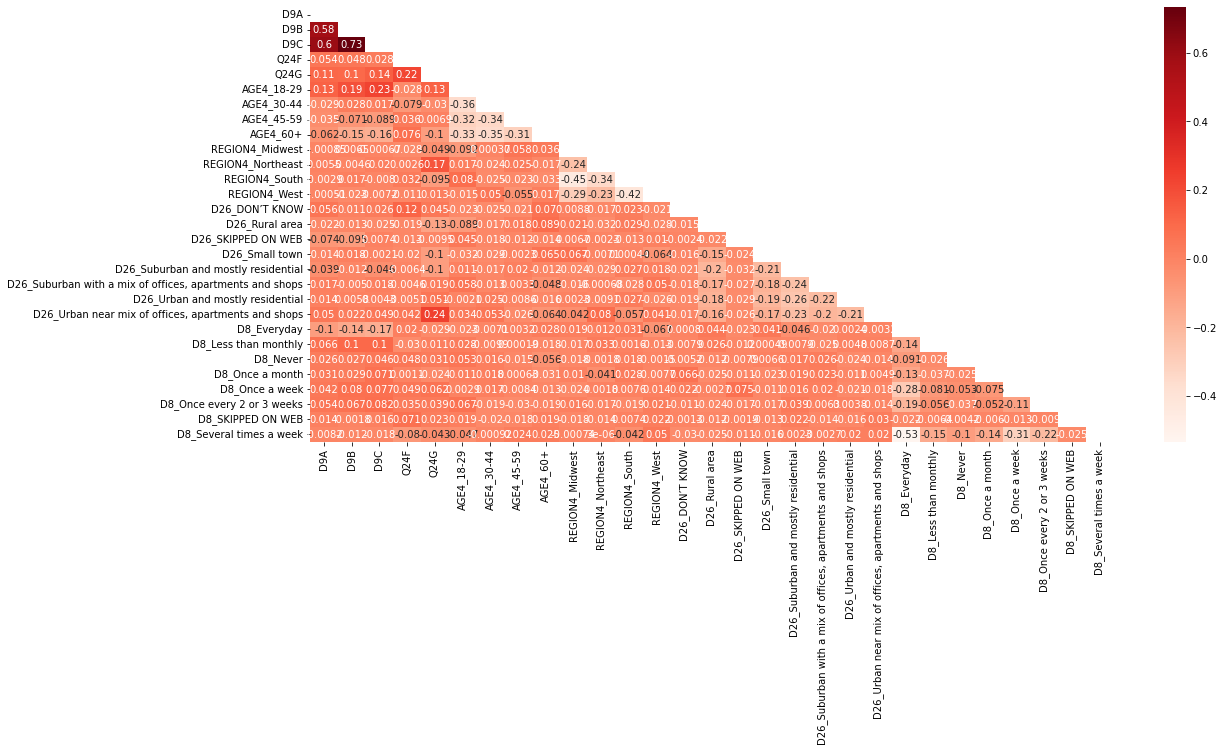

In [99]:
plt.figure(figsize=(18,8))
mask = np.triu(np.ones_like(df_clean2.corr(), dtype=bool))
sns.heatmap(df_clean2.corr(), mask=mask, annot = True, cmap='Reds')

In [100]:

print()

def get_redundant_pairs(df_clean2):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df_clean2.columns
    for i in range(0, df_clean2.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df_clean2, n=5):
    au_corr = df_clean2.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df_clean2)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df_clean2, 3))


Top Absolute Correlations
D9B  D9C    0.733358
D9A  D9C    0.601932
     D9B    0.576378
dtype: float64


### Correlation matrix of only importance factors

<AxesSubplot:>

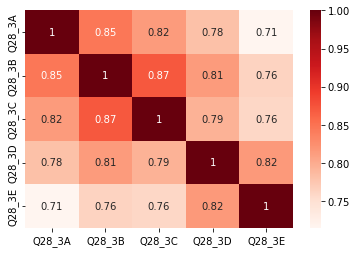

In [101]:
## all respondents
sns.heatmap(df_clean[['Q28_3A', 'Q28_3B', 'Q28_3C', 'Q28_3D', 'Q28_3E']].corr(), annot = True, cmap='Reds')

<AxesSubplot:>

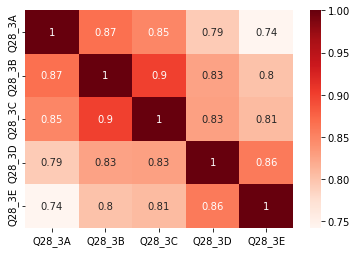

In [102]:
## senior respondents
sns.heatmap(df_clean[['Q28_3A', 'Q28_3B', 'Q28_3C', 'Q28_3D', 'Q28_3E']].loc[df_clean['senior'] == 1].corr(), annot = True, cmap='Reds')

In [103]:
## all respondents
df_clean[['Q28_3A', 'Q28_3B', 'Q28_3C', 'Q28_3D', 'Q28_3E']].corr()

,Q28_3A,Q28_3B,Q28_3C,Q28_3D,Q28_3E
Q28_3A,1.000000,0.845758,0.815026,0.780912,0.714830
Q28_3B,0.845758,1.000000,0.871604,0.814672,0.763837
Q28_3C,0.815026,0.871604,1.000000,0.794580,0.759706
Q28_3D,0.780912,0.814672,0.794580,1.000000,0.815553
Q28_3E,0.714830,0.763837,0.759706,0.815553,1.000000


In [104]:
## senior respondents
df_clean[['Q28_3A', 'Q28_3B', 'Q28_3C', 'Q28_3D', 'Q28_3E']].loc[df_clean['senior'] == 1].corr()

,Q28_3A,Q28_3B,Q28_3C,Q28_3D,Q28_3E
Q28_3A,1.000000,0.866902,0.848757,0.793060,0.742176
Q28_3B,0.866902,1.000000,0.900021,0.826315,0.800902
Q28_3C,0.848757,0.900021,1.000000,0.828341,0.806678
Q28_3D,0.793060,0.826315,0.828341,1.000000,0.858363
Q28_3E,0.742176,0.800902,0.806678,0.858363,1.000000


In [105]:
print(f"DF shape with all respondents: {df_clean[['Q28_3A', 'Q28_3B', 'Q28_3C', 'Q28_3D', 'Q28_3E']].shape}")
print(f"DF shape with senior respondents: {df_clean[['Q28_3A', 'Q28_3B', 'Q28_3C', 'Q28_3D', 'Q28_3E']].loc[df_clean['senior'] == 1].shape}")

DF shape with all respondents: (1947, 5)
DF shape with senior respondents: (467, 5)


# # dropping rows where all answers are the same

In [106]:
df_clean = df_clean.loc[~((df_clean['Q28_3A'] == df_clean['Q28_3B']) & (df_clean['Q28_3A'] == df_clean['Q28_3C']) & (df_clean['Q28_3A'] == df_clean['Q28_3D']) & (df_clean['Q28_3A'] == df_clean['Q28_3E'])& (df_clean['Q28_3A'] == df_clean['Q28_3D']))] 

<AxesSubplot:>

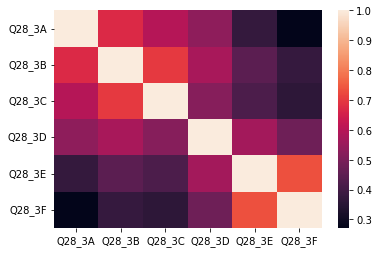

In [107]:
sns.heatmap(df_clean[['Q28_3A','Q28_3B','Q28_3C','Q28_3D','Q28_3E','Q28_3F']].corr())

<AxesSubplot:>

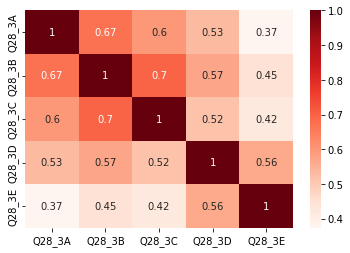

In [108]:
## all respondents
sns.heatmap(df_clean[['Q28_3A', 'Q28_3B', 'Q28_3C', 'Q28_3D', 'Q28_3E']].corr(), annot = True, cmap='Reds')

<AxesSubplot:>

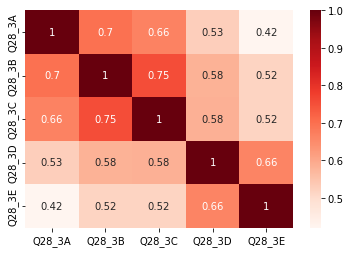

In [109]:
## senior respondents
sns.heatmap(df_clean[['Q28_3A', 'Q28_3B', 'Q28_3C', 'Q28_3D', 'Q28_3E']].loc[df_clean['senior'] == 1].corr(), annot = True, cmap='Reds')

In [110]:
## all respondents
df_clean[['Q28_3A', 'Q28_3B', 'Q28_3C', 'Q28_3D', 'Q28_3E']].corr()

,Q28_3A,Q28_3B,Q28_3C,Q28_3D,Q28_3E
Q28_3A,1.000000,0.671840,0.598549,0.531641,0.373134
Q28_3B,0.671840,1.000000,0.698689,0.573603,0.445024
Q28_3C,0.598549,0.698689,1.000000,0.516942,0.419609
Q28_3D,0.531641,0.573603,0.516942,1.000000,0.564891
Q28_3E,0.373134,0.445024,0.419609,0.564891,1.000000


In [111]:
## senior respondents
df_clean[['Q28_3A', 'Q28_3B', 'Q28_3C', 'Q28_3D', 'Q28_3E']].loc[df_clean['senior'] == 1].corr()

,Q28_3A,Q28_3B,Q28_3C,Q28_3D,Q28_3E
Q28_3A,1.000000,0.697397,0.664731,0.527318,0.419732
Q28_3B,0.697397,1.000000,0.753606,0.582652,0.515531
Q28_3C,0.664731,0.753606,1.000000,0.583186,0.516425
Q28_3D,0.527318,0.582652,0.583186,1.000000,0.662823
Q28_3E,0.419732,0.515531,0.516425,0.662823,1.000000


In [112]:
print(f"DF shape with all respondents: {df_clean[['Q28_3A', 'Q28_3B', 'Q28_3C', 'Q28_3D', 'Q28_3E']].shape}")
print(f"DF shape with senior respondents: {df_clean[['Q28_3A', 'Q28_3B', 'Q28_3C', 'Q28_3D', 'Q28_3E']].loc[df_clean['senior'] == 1].shape}")

DF shape with all respondents: (1064, 5)
DF shape with senior respondents: (244, 5)


### Replace Null Values with the mean of it's variable

In [113]:
#Look at the mean value of each question
df_clean.groupby('AGE4')[['Q28_3A','Q28_3B','Q28_3C','Q28_3D','Q28_3E','Q28_3F']].describe()

Q28_3A                                              Q28_3B            \
       count      mean       std  min  25%  50%  75%  max  count      mean   
AGE4                                                                         
18-29  297.0  3.387205  1.139688  1.0  3.0  3.0  4.0  5.0  295.0  3.722034   
30-44  293.0  3.238908  1.148669  1.0  2.0  3.0  4.0  5.0  290.0  3.617241   
45-59  220.0  3.150000  1.142875  1.0  2.0  3.0  4.0  5.0  222.0  3.558559   
60+    244.0  3.258197  1.116162  1.0  3.0  3.0  4.0  5.0  244.0  3.577869   

       ... Q28_3E      Q28_3F                                               
       ...    75%  max  count      mean       std  min  25%  50%  75%  max  
AGE4   ...                                                                  
18-29  ...    4.0  5.0  296.0  3.415541  1.146681  1.0  3.0  4.0  4.0  5.0  
30-44  ...    4.0  5.0  292.0  3.606164  1.041590  1.0  3.0  4.0  4.0  5.0  
45-59  ...    5.0  5.0  222.0  3.702703  1.085441  1.0  3.0  4.0  5.0  5.0  
60+    ...    5.0  5.0  244.0  3.709016  1.089305  1.0  3.0  4.0  5.0  5.0  

[4 rows x 48 columns]

### Since all questions have a mean close to 4, we can re-code all NA variables to 4 (can not use the mean because that would be inbetween two categorical values)

In [114]:
df_clean['Q28_3A'].fillna(4,inplace=True)
df_clean['Q28_3B'].fillna(4,inplace=True)
df_clean['Q28_3C'].fillna(4,inplace=True)
df_clean['Q28_3D'].fillna(4,inplace=True)
df_clean['Q28_3E'].fillna(4,inplace=True)
df_clean['Q28_3F'].fillna(4,inplace=True)

### Table looking at mean values of importance values for seniors

In [115]:
df_clean[(df_clean['AGE4']=='60+') & (df_clean['uses_pt']==1)][['Q28_3A','Q28_3B','Q28_3C','Q28_3D','Q28_3E','Q28_3F']].mean()

Q28_3A    3.009434
Q28_3B    3.443396
Q28_3C    3.584906
Q28_3D    3.386792
Q28_3E    3.660377
Q28_3F    3.660377
dtype: float64

1    83
Name: uses_pt, dtype: int64
1    83
2    64
3    54
4    29
6    23
0    21
5    20
7     6
8     2
Name: uses_pt, dtype: int64


<Figure size 1440x7200 with 0 Axes>

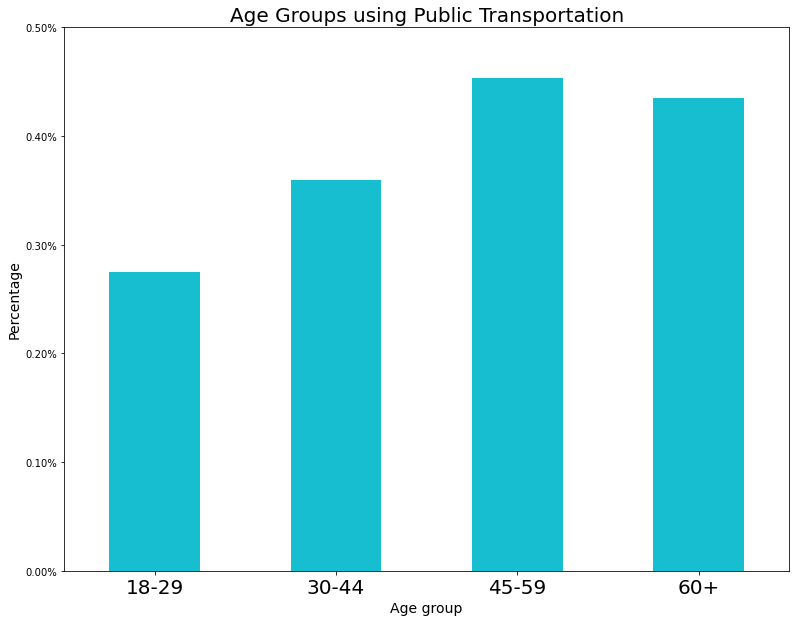

In [116]:

# Create bins for each importance factor to seniors and track normalized value counts
print(df_clean[(df_clean['AGE4']=='18-29') & (df_clean['uses_pt'] == 1)]['uses_pt'].value_counts())
print(df_clean[df_clean['AGE4']=='18-29']['uses_pt'].value_counts())
under_30 = df_clean[(df_clean['AGE4']=='18-29') & (df_clean['uses_pt'] == 1)]['uses_pt'].value_counts() / df_clean[df_clean['AGE4']=='18-29']['uses_pt'].value_counts().sum()
thirty_to_44 = df_clean[(df_clean['AGE4']=='30-44') & (df_clean['uses_pt'] == 1)]['uses_pt'].value_counts() / df_clean[df_clean['AGE4']=='30-44']['uses_pt'].value_counts().sum()
forty5_to_59 = df_clean[(df_clean['AGE4']=='45-59') & (df_clean['uses_pt'] == 1)]['uses_pt'].value_counts() / df_clean[df_clean['AGE4']=='45-59']['uses_pt'].value_counts().sum()
seniors = df_clean[(df_clean['AGE4']=='60+') & (df_clean['uses_pt'] == 1)]['uses_pt'].value_counts() / df_clean[df_clean['AGE4']=='60+']['uses_pt'].value_counts().sum()

#Create a new dataframe with all age groups to visualize
age_groups = pd.DataFrame([under_30,thirty_to_44,forty5_to_59,seniors])

#Make the graph
plt.figure(figsize=(20,100))
ax = age_groups.plot.bar(stacked=False,figsize=(13,10),rot=0,color='tab:cyan')

plt.title('Age Groups using Public Transportation', fontsize=20)
plt.ylabel('Percentage',fontsize=14)
plt.xlabel('Age group', fontsize=14)
ax.set_xticklabels( ('18-29','30-44','45-59','60+') )
ax.tick_params(axis='x', labelsize=20,rotation=0)
# remove legend
ax.get_legend().remove()
# set y axis limit
ax.set_ylim([0, 0.5])
# we also want the y-axis as percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

###  Use Transportation by Community Type

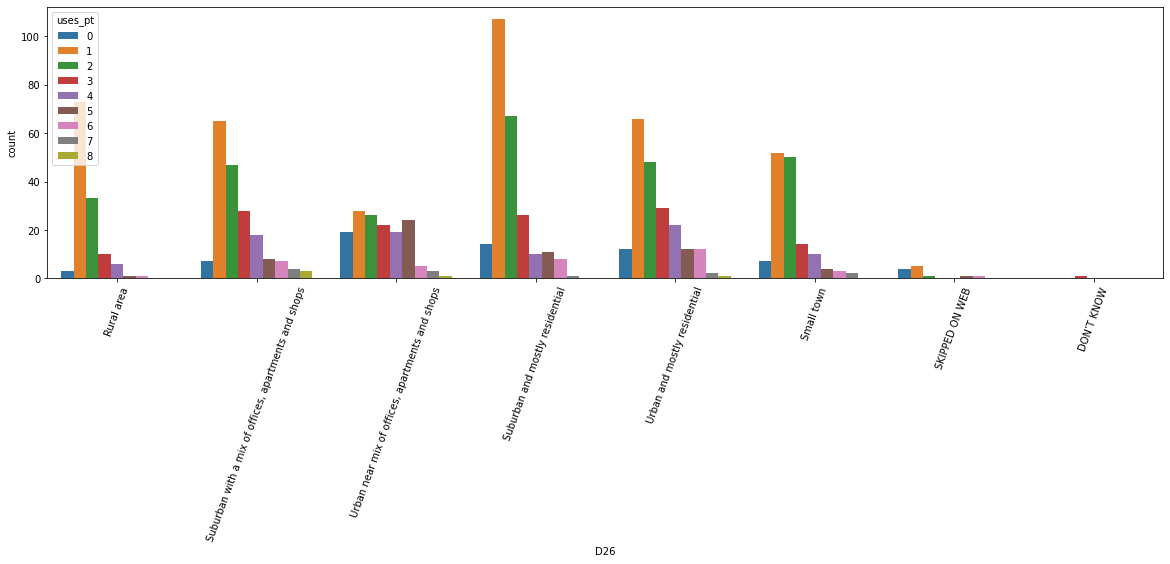

In [117]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.countplot(data= df_clean, x= 'D26', hue= 'uses_pt', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 70)
plt.show()

## Use Transportation by Income

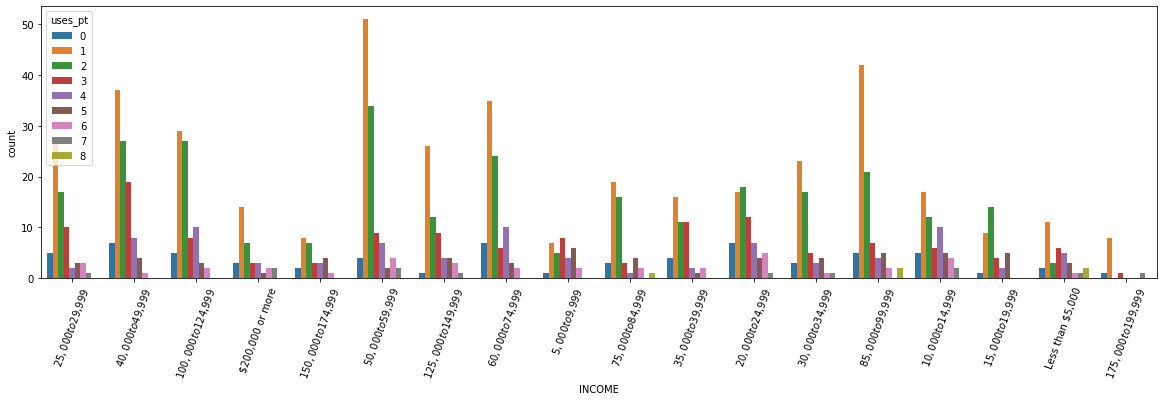

In [118]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.countplot(data= df_clean, x= 'INCOME', hue= 'uses_pt', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 70)
plt.show()

## Age by Community Type

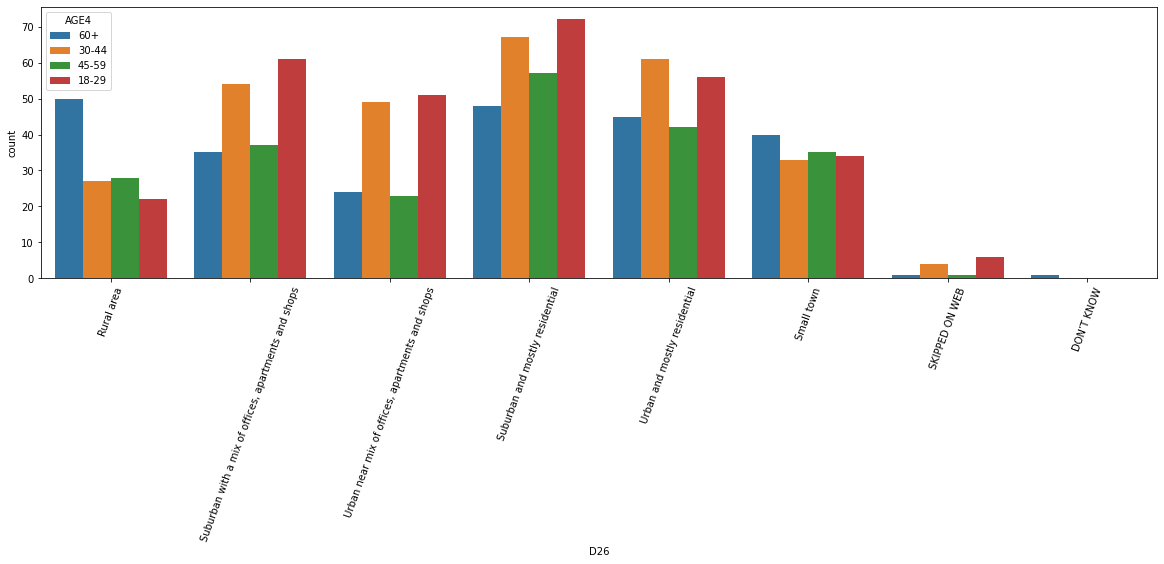

In [119]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.countplot(data= df_clean, x= 'D26', hue= 'AGE4', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 70)
plt.show()

## Age and Income

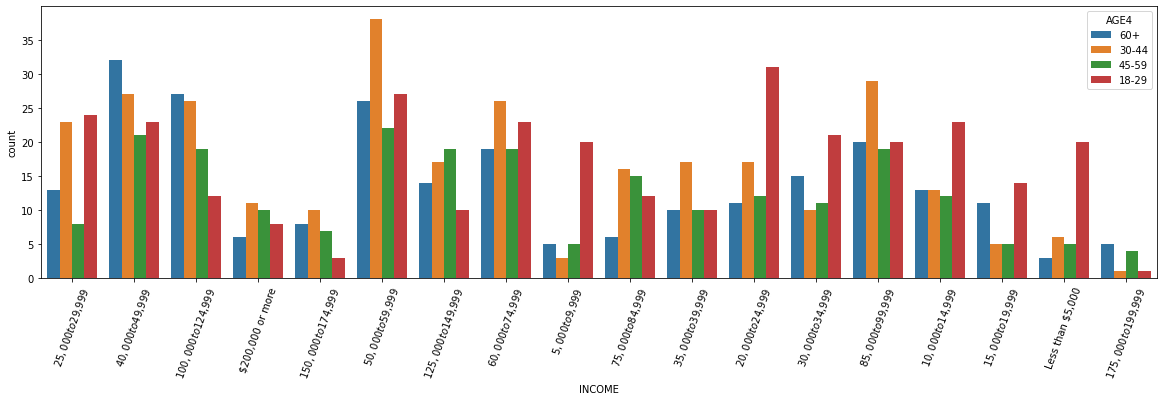

In [120]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.countplot(data= df_clean, x= 'INCOME', hue= 'AGE4', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 70)
plt.show()

<AxesSubplot:xlabel='D9C', ylabel='count'>

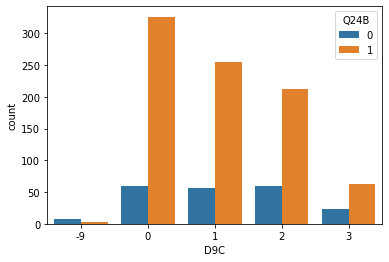

In [121]:
# Q24B-Drive D9C-Isolated
sns.countplot(data= df_clean, x= 'D9C', hue= 'Q24B')

<AxesSubplot:xlabel='D9C', ylabel='count'>

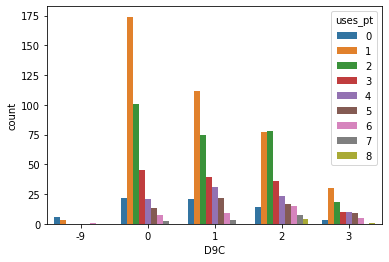

In [122]:
# uses pt D9C-Isolated
sns.countplot(data= df_clean, x= 'D9C', hue= 'uses_pt')

In [123]:
age_groups

,1
uses_pt,0.274834
uses_pt,0.359322
uses_pt,0.452915
uses_pt,0.434426


<AxesSubplot:xlabel='AGE4,uses_pt'>

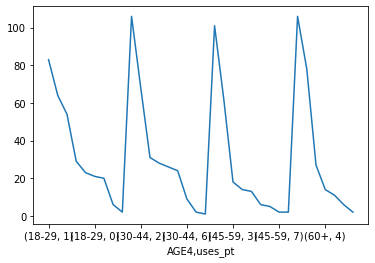

In [124]:
df_clean.groupby('AGE4')['uses_pt'].value_counts().plot(kind='line')

In [125]:
df_clean[(df_clean['AGE4']!='60+') & (df_clean['uses_pt']==1)][['Q28_3A','Q28_3B','Q28_3C','Q28_3D','Q28_3E','Q28_3F']].describe()

,Q28_3A,Q28_3B,Q28_3C,Q28_3D,Q28_3E,Q28_3F
count,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000
mean,3.024138,3.427586,3.479310,3.451724,3.672414,3.537931
std,1.120478,1.095728,1.032978,1.100211,1.078059,1.110009
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# Kruskal-Wallis H test between elderly and other ages

In [126]:
from scipy.stats import ttest_ind
import statistics
from scipy import stats

In [127]:
seniors = df_clean[df_clean['AGE4']=='60+']
other_age = df_clean[df_clean['AGE4']!='60+']

In [128]:
seniors.shape

(244, 266)

In [129]:
other_age.shape

(820, 266)

In [130]:
print(statistics.variance(seniors['Q28_3A']) == statistics.variance(other_age['Q28_3A']))

False


In [131]:
stats.kruskal(seniors['Q28_3A'], other_age['Q28_3A'])

KruskalResult(statistic=0.013998009431264342, pvalue=0.9058195117072689)

In [132]:
print(statistics.variance(seniors['Q28_3B']) == statistics.variance(other_age['Q28_3B']))

False


In [133]:
stats.kruskal(seniors['Q28_3B'], other_age['Q28_3B'])

KruskalResult(statistic=0.679126130662032, pvalue=0.4098878003547658)

In [134]:
print(statistics.variance(seniors['Q28_3C']) == statistics.variance(other_age['Q28_3C']))

False


In [135]:
stats.kruskal(seniors['Q28_3C'], other_age['Q28_3C'])

KruskalResult(statistic=0.35453390864265505, pvalue=0.5515577473681598)

In [136]:
print(statistics.variance(seniors['Q28_3D']) == statistics.variance(other_age['Q28_3D']))

False


In [137]:
stats.kruskal(seniors['Q28_3D'], other_age['Q28_3D'])

KruskalResult(statistic=1.5316351535358195, pvalue=0.21586720315598842)

In [138]:
print(statistics.variance(seniors['Q28_3E']) == statistics.variance(other_age['Q28_3E']))

False


In [139]:
stats.kruskal(seniors['Q28_3E'],other_age['Q28_3E'])

KruskalResult(statistic=0.9348117511528862, pvalue=0.3336157079934995)

In [140]:
print(statistics.variance(seniors['Q28_3F']) == statistics.variance(other_age['Q28_3F']))

False


In [141]:
stats.kruskal(seniors['Q28_3F'], other_age['Q28_3F'])

KruskalResult(statistic=3.6276567661627985, pvalue=0.0568267727461436)

In [142]:
#none of them are different lol, so we say that there is no difference between the elderly and regular people, so we can use
#perceptions of everyone and its the same difference

## a box plot

C:\Users\Tonyj\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 67.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Tonyj\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 60.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Tonyj\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


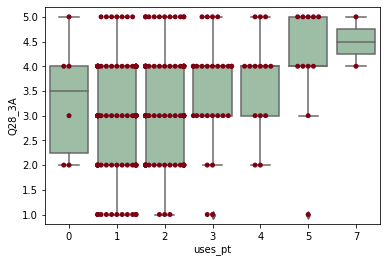

In [143]:
ax = sns.boxplot(x='uses_pt', y='Q28_3A', data=df_clean[df_clean['AGE4']=='60+'], color='#99c2a2')
ax = sns.swarmplot(x="uses_pt", y="Q28_3A", data=df_clean[df_clean['AGE4']=='60+'], color='#7d0013')
plt.show()

In [144]:
df_clean.info

<bound method DataFrame.info of       Unnamed: 0  CaseId    WEIGHT                                LGBT  \
0              0    54.0  0.756810  Straight (that is not gay/lesbian)   
1              1    56.0  2.931238  Straight (that is not gay/lesbian)   
2              2    67.0  6.867710  Straight (that is not gay/lesbian)   
3              3    68.0  0.827716  Straight (that is not gay/lesbian)   
4              4    72.0  0.712991  Straight (that is not gay/lesbian)   
...          ...     ...       ...                                 ...   
1940        1940  8198.0  2.776333  Straight (that is not gay/lesbian)   
1941        1941  8200.0  0.920483  Straight (that is not gay/lesbian)   
1942        1942  8204.0  0.408771  Straight (that is not gay/lesbian)   
1943        1943  8205.0  0.043247                         Gay/lesbian   
1945        1945  8210.0  1.140623  Straight (that is not gay/lesbian)   

                              Q1                          Q2  \
0              

In [145]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['1'], df['0'],)
print(fvalue, pvalue)

NameError: name 'df' is not defined

### -----------------------------------------------------------------------------------------------------------------------

# Visualizations-these have changed a bit because they are being done on cleaned data, not sure if we want to do a before and after cleaning

In [ ]:
# Create bins for each transportation mode used by seniors and track normalized value counts
pub_trans = seniors['Q24G'].value_counts(sort=False,normalize=True)
walk = seniors['Q24A'].value_counts(sort=False,normalize=True)
drive = seniors['Q24B'].value_counts(sort=False,normalize=True)
others_drive = seniors['Q24C'].value_counts(sort=False,normalize=True)
taxi = seniors['Q24D'].value_counts(sort=False,normalize=True)
uber = seniors['Q24E'].value_counts(sort=False,normalize=True)
special_trans = seniors['Q24F'].value_counts(sort=False,normalize=True)
no_leave = seniors['Q24J'].value_counts(sort=False,normalize=True)

#Create a new dataframe with all the types of transit modes to visualize
transit_modes = pd.DataFrame([pub_trans,walk,drive,others_drive,taxi,uber,special_trans,no_leave])

#Make the graph
plt.figure(figsize=(20,100))
ax = transit_modes[1].plot.bar(stacked=False,figsize=(13,10),rot=0)

plt.title('Modes of Transportation for Seniors', fontsize=20)
plt.ylabel('',fontsize=14)
ax.set_xticklabels( ('Public Transit', 'Walk','Drive','Have Others Drive Them','Taxi','Uber/Lyft','Special Transit','Does not Leave House') )
ax.tick_params(axis='x', labelsize=20,rotation=65)
plt.show()

In [ ]:
# Create bins for each importance factor to seniors and track normalized value counts
close = seniors['Q28_3A'].value_counts(sort=True,normalize=True)
affordable = seniors['Q28_3B'].value_counts(sort=False,normalize=True)
maintained = seniors['Q28_3C'].value_counts(sort=False,normalize=True)
timely = seniors['Q28_3D'].value_counts(sort=False,normalize=True)
safe = seniors['Q28_3E'].value_counts(sort=False,normalize=True)
special_services = seniors['Q28_3F'].value_counts(sort=False,normalize=True)

#Create a new dataframe with all the types of transit modes to visualize
importance_factors = pd.DataFrame([close,affordable,maintained,timely,safe,special_services])

#Make the graph
plt.figure(figsize=(20,100))
ax = importance_factors.plot.bar(stacked=False,figsize=(13,10),rot=0)

plt.title('Importance Factors for Seniors', fontsize=20)
plt.ylabel('',fontsize=14)
ax.set_xticklabels( ('Close to Home','Affordable','Well-Maintained','Timely','Safe','Special Services') )
ax.tick_params(axis='x', labelsize=20,rotation=65)
plt.show()

In [ ]:
# how many types of transportation modes do seniors use-kaylee

# I want to use groupby feature to see the breakdown of each mode, but that still needs to come because that info
# isn't in the seniors database yet, and I also need to make sure its in order with that random 0
plt.figure(figsize=(20,100))
ax = seniors['number_of_modes'].value_counts(sort=True).plot.bar(stacked=False,figsize=(13,10),rot=0)
plt.title('How Many Different Modes of Transportation Are Used by Seniors', fontsize=20)
plt.ylabel('',fontsize=14)
ax.tick_params(axis='x', labelsize=20,rotation=65)
plt.show()

In [ ]:
sns.regplot(data=df_clean,x='Q28_3E',y='uses_pt')

In [ ]:
for i in df_clean[['Q28_3A','Q28_3B','Q28_3C','Q28_3D','Q28_3E','Q28_3F']].columns:
    pd.crosstab(df_clean[i],df_clean['uses_pt'],normalize='index').plot(kind='bar')
    plt.title(i)
    plt.show()

In [ ]:
df_clean.loc[(df_clean['Salary_in_1000']>=100) & (df_clean['Age']< 60)]

In [ ]:
# Create bins for each importance factor to seniors and track normalized value counts
close = df_clean.loc[(df_clean['uses_pt']==1) & (df_clean['AGE4']=='60+')['Q28_3A']].value_counts(sort=False,normalize=True)
affordable = df_clean.loc[(df_clean['uses_pt']==1) & (df_clean['AGE4']=='60+')['Q28_3B']].value_counts(sort=False,normalize=True)
maintained = df_clean.loc[(df_clean['uses_pt']==1) & (df_clean['AGE4']=='60+')['Q28_3C']].value_counts(sort=False,normalize=True)
timely = df_clean.loc[(df_clean['uses_pt']==1) & (df_clean['AGE4']=='60+')['Q28_3D']].value_counts(sort=False,normalize=True)
safe = df_clean.loc[(df_clean['uses_pt']==1) & (df_clean['AGE4']=='60+')['Q28_3E']].value_counts(sort=False,normalize=True)
special_services = df_clean.loc[(df_clean['uses_pt']==1) & (df_clean['AGE4']=='60+')['Q28_3F']].value_counts(sort=False,normalize=True)

#Create a new dataframe with all the types of transit modes to visualize
importance_factors = pd.DataFrame([close,affordable,maintained,timely,safe,special_services])

chart_frame = importance_factors.transpose()

#Make the graph
plt.figure(figsize=(20,100))
ax = chart_frame.plot.line(figsize=(13,10),rot=0)

plt.title('Importance Factors for Seniors who use Public Transportation', fontsize=20)
plt.ylabel('Percentage of Respondents',fontsize=14)
ax.set_xticklabels(('Not at all Important','Not very important','Somewhat important','Very Important','Extremely Important'))
ax.tick_params(axis='x', labelsize=20,rotation=65)
ax.set_xticks([1,2,3,4,5])
plt.show()

In [ ]:
df_clean.to_csv('Data/clean_df.csv')